Choose Your region and Run the complete script at once after forking the repository and it will create its own path and outputs!

In [1]:
# ## Creating maps and bar graphs at every output level -
# 1. Upload gdf_X of all 5 states and counties - to create maps - for every year and underserved race
# 2. Get bar graph code for plotting for - 3 years (3 bars)

# Project: Equity and Inclusive Growth Indicators Analysis

## Overview
This project aims to compare the PlanRVA (MPO) footprint data (or Richmond Region, as available) with other regions on Equity and Inclusive Growth Indicators, specifically focusing on underserved populations.

### Definitions
- **Underserved populations** are defined by the EDA as Black, Latino, and Indigenous and Native American persons, Asian Americans and Pacific Islanders, and other persons of color (all Census Race categories except White).

### Data Sources
- Greater Washington Partnership Inclusive Growth Dashboard
- Urban Institute Mobility Dashboard
- Census Profiles
- ACS 5 Year datasets

## Indicators of Distress Analysis

### Objectives
- Present data in aggregate and disaggregated by race.
- Use comparisons of numbers, percentages, and bar charts for representation.

### Indicators to Analyze
- Income
- Wage
- Poverty
- Educational attainment
- Unemployment

## Mapping Population demographics

### Objectives
Map the percentage of the population under poverty, focusing on:
- Black or African American population
- Hispanic or Latino population
- All underserved race categories combined

### Questions to Address
1. What percentage of the population in PlanRVA's footprint are underserved?
2. What percentage of the population is under poverty?
3. What percentage of the underserved population is under poverty?
4. Identify concentrated pockets of poverty within the region.

## Median Household Income 

### Objectives
- Compare the median household income of our region to other regions.
- Analyze median household income disaggregated by race categories.

### Representation
- Use simple bar charts for comparisons.
- Map Median Household Income at the Census Tract level for all races, Black and African Americans, Hispanic or Latino, and all underserved populations.

## Unemployment Rate Analysis

### Objectives
- Compare the overall unemployment rate with other regions.
- Disaggregate unemployment rates by race categories within the region.

### Representation
- Identify disparities and pockets of high unemployment across the region through maps.

## Educational Attainment Analysis

- Follow the same format as the "Median Household Income Analysis" section for educational attainment.

## Potential Cities for Comparison
- **Louisville/Jefferson Metro Area, Kentucky**: Jefferson, Shelby, Bullitt, Oldham, Spencer
- **Indiana**: Floyd, Clark
- **Nashville Metro Area**: Rutherford, Wilson, Sumner, Robertson, Cheatham, Davidson, Williamson
- **Baltimore Metro Area**: Anne Arundel, Baltimore City, Baltimore County, Carroll, Harford, Queen Anne's


# 2022 ACS 5-Year

In [1]:
# import os
# os.getcwd()

In [2]:
# folder_name = 'Project_data'  # folder name
# path = os.path.join(os.getcwd(), folder_name)

# try:
#     os.makedirs(path, exist_ok=True)
#     print(f"Folder '{folder_name}' created successfully.")
# except Exception as e:
#     print(f"Failed to create folder '{folder_name}'. Error: {e}")


In [3]:
# folder_name = 'Plots'  # folder name
# path = os.path.join(os.getcwd(), folder_name)

# try:
#     os.makedirs(path, exist_ok=True)
#     print(f"Folder '{folder_name}' created successfully.")
# except Exception as e:
#     print(f"Failed to create folder '{folder_name}'. Error: {e}")


In [4]:
# !git status

In [5]:
# !git add .

In [6]:
# !git commit -m "Project Started"

In [7]:
## Import code for census and start working

In [47]:
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import hvplot.pandas
import panel as pn
import holoviews as hv
import os
from holoviews import opts
import matplotlib.pyplot as plt


In [29]:
# Rishabh's API Key from census.gov
usr_key = '&key=6b0a4e1479613a5be20d0e11af6d4711d87d2a61'


In [30]:
pd.set_option("display.max_rows", 10)

In [11]:
# Change directory to data folder to download, change to plots later when plotting
os.chdir('C:\\Users\\rsingh\\OneDrive - PlanRVA\\Documents\\2_Projects\\Extras\\Regional-Demographic-Visualizations\\Regional-Demographics-Visualizations\\Project_StressIndicators\\Project_Data')

In [ ]:
#Import us counties to create separate boundary layers for all.


In [71]:
gdf_county = gpd.read_file(r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\DataHub-Rishabh\Default Shapefiles\us_county\tl_rd22_us_county.shp")
gdf_county.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,NaN,NaN,NaN,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,NaN,NaN,NaN,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,NaN,NaN,NaN,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,NaN,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,NaN,NaN,NaN,A,1489645188,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [ ]:
## Import gdfs for mapping later

In [46]:
gdf_PlanRVA.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,51,085,320100,51085320100,3201,Census Tract 3201,G5020,S,328537534,2927606,+37.8856871,-077.5726776,"POLYGON ((-77.74029 37.87408, -77.73998 37.874..."
1,51,085,321201,51085321201,3212.01,Census Tract 3212.01,G5020,S,11255521,16144,+37.5867060,-077.3295398,"POLYGON ((-77.36115 37.60754, -77.36084 37.607..."
2,51,085,321202,51085321202,3212.02,Census Tract 3212.02,G5020,S,8887075,96758,+37.5858032,-077.3462287,"POLYGON ((-77.38286 37.59526, -77.38280 37.595..."
3,51,085,320400,51085320400,3204,Census Tract 3204,G5020,S,58245255,348336,+37.7231726,-077.5209363,"POLYGON ((-77.61233 37.75986, -77.61216 37.760..."
4,51,087,201002,51087201002,2010.02,Census Tract 2010.02,G5020,S,3022230,4272,+37.5725532,-077.4043263,"POLYGON ((-77.41507 37.56327, -77.41492 37.563..."


<AxesSubplot:>

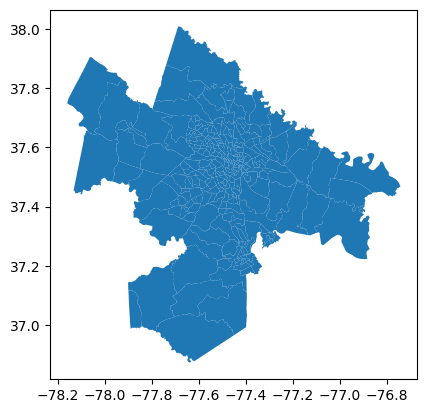

In [8]:
gdf_PlanRVA = gpd.read_file(r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\DataHub-Rishabh\Default Shapefiles\RTC\Tract\RTC_Tracts.shp")

gdf_PlanRVA.plot()

<AxesSubplot:>

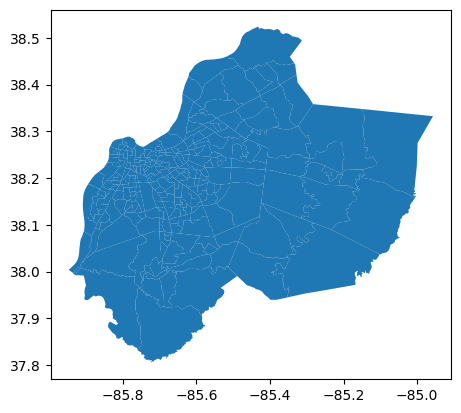

In [75]:
gdf_Kentucky = gpd.read_file(r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Regional-Demographic-Visualizations\Regional-Demographics-Visualizations\Project_StressIndicators\Project_data\Shapefiles_CT_2022\tl_rd22_21_tract\tl_rd22_21_tract.shp")

# Define the list of COUNTYFP values you want to subset
counties_to_keep = ['111', '211', '029', '185', '215']

# Subset the GeoDataFrame based on the COUNTYFP values
gdf_Kentucky = gdf_Kentucky[gdf_Kentucky['COUNTYFP'].isin(counties_to_keep)]

gdf_Kentucky.plot()

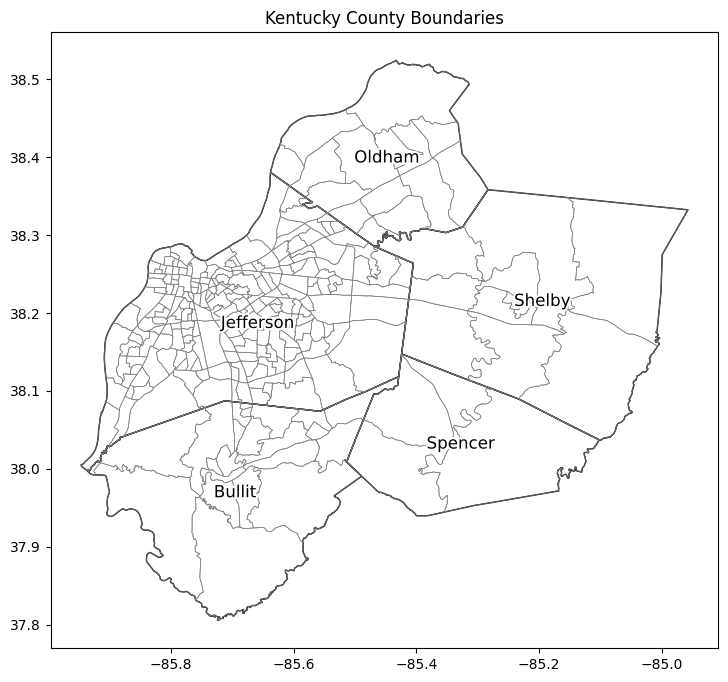

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import patheffects

# Filter the gdf_county to get only the Kentucky counties specified in counties_to_keep
ky_counties_to_plot = gdf_county[(gdf_county['STATEFP'] == '21') & (gdf_county['COUNTYFP'].isin(counties_to_keep))]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the Kentucky county boundaries from gdf_county
ky_counties_to_plot.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Plot the original Kentucky county boundaries from gdf_Kentucky
gdf_Kentucky.plot(ax=ax, color='none', edgecolor='grey', linewidth=0.5)

# Dissolve the GeoDataFrame by 'COUNTYFP' and aggregate other columns using 'first' function
county_centroids = gdf_Kentucky.dissolve(by='COUNTYFP', aggfunc='first')

# Plot the county centroids and label them with halo effect
for idx, row in county_centroids.iterrows():
    # Get the county name based on index (COUNTYFP)
    if idx == '111':
        county_name = 'Jefferson'
    elif idx == '211':
        county_name = 'Shelby'
    elif idx == '029':
        county_name = 'Bullit'
    elif idx == '185':
        county_name = 'Oldham'
    elif idx == '215':
        county_name = 'Spencer'
    else:
        county_name = 'Other'  # Handle other counties
    
    # Get the centroid of the geometry
    centroid = row['geometry'].centroid
    
    # Plot the county name at the centroid with halo effect
    text = ax.text(centroid.x, centroid.y, county_name, fontsize=12, ha='center', va='center')
    text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')]) ## Halo effect

# Add title and legend
plt.title('Kentucky County Boundaries')

# Show the plot
plt.show()


<AxesSubplot:>

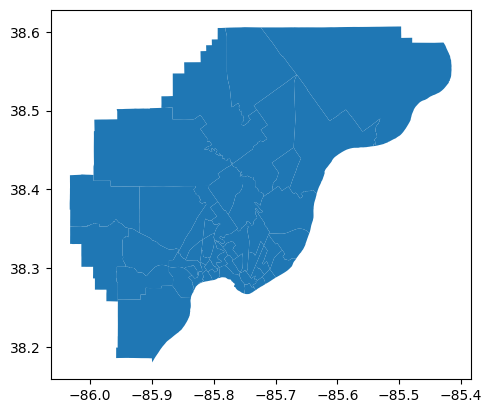

In [19]:
gdf_Indiana = gpd.read_file(r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Regional-Demographic-Visualizations\Regional-Demographics-Visualizations\Project_StressIndicators\Project_data\Shapefiles_CT_2022\tl_rd22_18_tract\tl_rd22_18_tract.shp")

# Define the list of COUNTYFP values you want to subset
counties_to_keep = ['043','019']

# Subset the GeoDataFrame based on the COUNTYFP values
gdf_Indiana = gdf_Indiana[gdf_Indiana['COUNTYFP'].isin(counties_to_keep)]

gdf_Indiana.plot()


C:\Users\rsingh\anaconda3\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

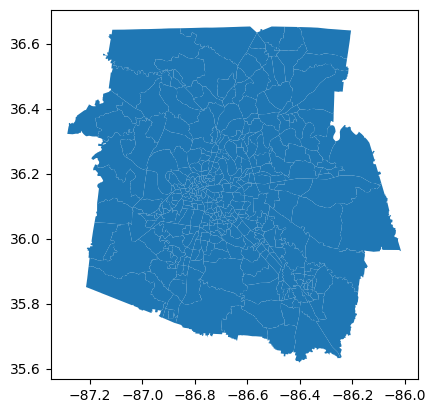

In [20]:
gdf_Nashville = gpd.read_file(r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Regional-Demographic-Visualizations\Regional-Demographics-Visualizations\Project_StressIndicators\Project_data\Shapefiles_CT_2022\tl_rd22_47_tract\tl_rd22_47_tract.shp")

# Define the list of COUNTYFP values you want to subset
counties_to_keep = ['149','189','165','147','021','037','187']

# Subset the GeoDataFrame based on the COUNTYFP values
gdf_Nashville = gdf_Nashville[gdf_Nashville['COUNTYFP'].isin(counties_to_keep)]

gdf_Nashville.plot()


<AxesSubplot:>

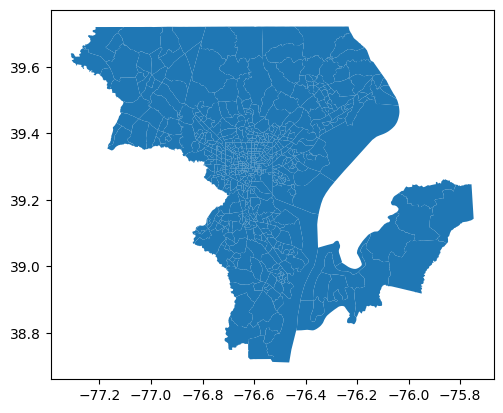

In [22]:
gdf_Baltimore = gpd.read_file(r"C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Regional-Demographic-Visualizations\Regional-Demographics-Visualizations\Project_StressIndicators\Project_data\Shapefiles_CT_2022\tl_rd22_24_tract\tl_rd22_24_tract.shp")

# Define the list of COUNTYFP values you want to subset
counties_to_keep = ['003','510','005','013','025','035']

# Subset the GeoDataFrame based on the COUNTYFP values
gdf_Baltimore = gdf_Baltimore[gdf_Baltimore['COUNTYFP'].isin(counties_to_keep)]

gdf_Baltimore.plot()


# CHOOSE REGION

### Update state and county variables right here for all the script

In [31]:
# Select Region to start by removing the '#'

# #PlanRVA
# state = '51'
# county = '041,075,085,087,145,760,730,570,670,127,036'

# # Comparing with Louisville/Jefferson Metro Area, Kentucky - 
# state = '21'
# county = '111,211,029,185,215'
# # Jefferson [111], Shelby [211], Bullit [029], Oldham [185], Spencer [215]

# Indiana
state = '18'
county = '043,019'
# Floyd [043], Clark [019]`
 
# # Nashville Metro Area
# state = '47'
# county = '149,189,165,147,021,037,187'
# # Rutherford [149], Wilson [189], Sumner [47165], Robertson [147], Cheatham [021], Davidson [037], Williamson [187]
 
# # Baltimore Metro Area
# state = '24'
# county = '003,510,005,013,025,035'
# # Anne Arundel [003], Baltimore City [510], Baltimore County [005], Carroll [013], Harford [025], Queen Anne's [035]

In [32]:
# Creating folder for Selected Region

def get_state_name(state_code):
    state_names = {
        '51': 'PlanRVA',
        '21': 'Kentucky',
        '18': 'Indiana',
        '47': 'Nashville',
        '24': 'Baltimore'
    }
    # Return the state name corresponding to the state_code, or 'Unknown State' if not found
    return state_names.get(state, 'Unknown State')

folder_name = get_state_name(state)  # folder name
path = os.path.join(os.getcwd(), folder_name)

try:
    os.makedirs(path, exist_ok=True)
    print(f"State Code: {state}, Folder Name: {folder_name}")
    print(f"Folder '{folder_name}' created successfully.")
except Exception as e:
    print(f"Failed to create folder '{folder_name}'. Error: {e}")


State Code: 18, Folder Name: Indiana
Folder 'Indiana' created successfully.


## Median Income by Race

In [33]:
def read_excel_from_folder(folder_name, file_name):
    # Construct the full path to the file
    file_path = f"{folder_name}/{file_name}"
    
    # Read the Excel file from the constructed path
    return pd.read_excel(file_path, index_col=0)

In [34]:
## Update: adding other regions

In [35]:
Year = '2022' #Set which year you need the data for

In [36]:
## Census Tracts
# ACS demographic data (selected variables)

#Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='

### White non Hispanic

variables = 'B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E'

for_param = '&for=tract:*'#All tracts
in_param = '&in=state:'
#state = '51'
in_param2 = '&in=county:'
query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)




<Response [200]>


In [37]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_dp = pd.DataFrame(data, columns= data[0])
df_dp = df_dp.drop(df_dp.index[0])

# Create GEOID
df_dp ['GEOID'] = df_dp['state']+df_dp['county']+df_dp['tract']
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,state,county,tract,GEOID
1,40988,48258,33869,-666666666,-666666666,-666666666,-666666666,40865,41912,-666666666,18,019,050100,18019050100
2,34857,28333,38088,-666666666,-666666666,-666666666,-666666666,-666666666,29659,43125,18,019,050200,18019050200
3,46229,52083,12554,-666666666,-666666666,-666666666,-666666666,-666666666,47656,-666666666,18,019,050303,18019050303
4,62879,59907,77198,-666666666,-666666666,-666666666,-666666666,-666666666,59833,-666666666,18,019,050304,18019050304
5,70938,77638,42054,-666666666,-666666666,-666666666,-666666666,-666666666,77948,-666666666,18,019,050305,18019050305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,77606,77828,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,77924,-666666666,18,043,071007,18043071007
44,105577,105508,-666666666,-666666666,-666666666,-666666666,-666666666,108750,105508,-666666666,18,043,071101,18043071101
45,112969,109500,-666666666,-666666666,-666666666,-666666666,-666666666,250001,109500,-666666666,18,043,071103,18043071103
46,96389,97222,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,96250,-666666666,18,043,071104,18043071104


In [38]:
# Rename column headers
# df_edu.rename (columns = {'DP04_0101E':'HC_Mort', 'DP04_0109E':'HC_NoMort'}, inplace = True)

# #Rename column headers for 2011 (column names are different for 2011 in the source data)
# df_HC.rename (columns = {'DP04_0100E':'HC_Mort', 'DP04_0107E':'HC_NoMort'}, inplace = True)

# assigning "year" value
df_dp['year'] = Year

# assigning Race
#df_dp['Race'] = "White_NH"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')

# Applying locality names to the dataframe
df_dp['locality'] = df_dp.apply(lambda row: locality(row), axis = 1)
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,state,county,tract,GEOID,year,locality
1,40988,48258,33869,-666666666,-666666666,-666666666,-666666666,40865,41912,-666666666,18,019,050100,18019050100,2022,Clark
2,34857,28333,38088,-666666666,-666666666,-666666666,-666666666,-666666666,29659,43125,18,019,050200,18019050200,2022,Clark
3,46229,52083,12554,-666666666,-666666666,-666666666,-666666666,-666666666,47656,-666666666,18,019,050303,18019050303,2022,Clark
4,62879,59907,77198,-666666666,-666666666,-666666666,-666666666,-666666666,59833,-666666666,18,019,050304,18019050304,2022,Clark
5,70938,77638,42054,-666666666,-666666666,-666666666,-666666666,-666666666,77948,-666666666,18,019,050305,18019050305,2022,Clark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,77606,77828,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,77924,-666666666,18,043,071007,18043071007,2022,Floyd
44,105577,105508,-666666666,-666666666,-666666666,-666666666,-666666666,108750,105508,-666666666,18,043,071101,18043071101,2022,Floyd
45,112969,109500,-666666666,-666666666,-666666666,-666666666,-666666666,250001,109500,-666666666,18,043,071103,18043071103,2022,Floyd
46,96389,97222,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,96250,-666666666,18,043,071104,18043071104,2022,Floyd


In [39]:
#df_dp=df_dp.iloc[1:,:]

In [40]:
df_dp.columns

Index(['B19013_001E', 'B19013A_001E', 'B19013B_001E', 'B19013C_001E',
       'B19013D_001E', 'B19013E_001E', 'B19013F_001E', 'B19013G_001E',
       'B19013H_001E', 'B19013I_001E', 'state', 'county', 'tract', 'GEOID',
       'year', 'locality'],
      dtype='object')

In [41]:
df_dp['Reg_Avg'] = df_dp['B19013_001E'].astype(int)
df_dp['Wh_alone'] = df_dp['B19013A_001E'].astype(int) 
df_dp['Black'] = df_dp['B19013B_001E'].astype(int) 
df_dp['AI_AN'] = df_dp['B19013C_001E'].astype(int) 
df_dp['Asian_alo'] = df_dp['B19013D_001E'].astype(int)
df_dp['NHPI'] = df_dp['B19013E_001E'].astype(int)
df_dp['Some_other'] = df_dp['B19013F_001E'].astype(int)
df_dp['Two_or_more'] = df_dp['B19013G_001E'].astype(int)
df_dp['Wh_NH'] = df_dp['B19013H_001E'].astype(int)
df_dp['Hisp'] = df_dp['B19013I_001E'].astype(int)

In [42]:
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,...,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
1,40988,48258,33869,-666666666,-666666666,-666666666,-666666666,40865,41912,-666666666,...,40988,48258,33869,-666666666,-666666666,-666666666,-666666666,40865,41912,-666666666
2,34857,28333,38088,-666666666,-666666666,-666666666,-666666666,-666666666,29659,43125,...,34857,28333,38088,-666666666,-666666666,-666666666,-666666666,-666666666,29659,43125
3,46229,52083,12554,-666666666,-666666666,-666666666,-666666666,-666666666,47656,-666666666,...,46229,52083,12554,-666666666,-666666666,-666666666,-666666666,-666666666,47656,-666666666
4,62879,59907,77198,-666666666,-666666666,-666666666,-666666666,-666666666,59833,-666666666,...,62879,59907,77198,-666666666,-666666666,-666666666,-666666666,-666666666,59833,-666666666
5,70938,77638,42054,-666666666,-666666666,-666666666,-666666666,-666666666,77948,-666666666,...,70938,77638,42054,-666666666,-666666666,-666666666,-666666666,-666666666,77948,-666666666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,77606,77828,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,77924,-666666666,...,77606,77828,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,77924,-666666666
44,105577,105508,-666666666,-666666666,-666666666,-666666666,-666666666,108750,105508,-666666666,...,105577,105508,-666666666,-666666666,-666666666,-666666666,-666666666,108750,105508,-666666666
45,112969,109500,-666666666,-666666666,-666666666,-666666666,-666666666,250001,109500,-666666666,...,112969,109500,-666666666,-666666666,-666666666,-666666666,-666666666,250001,109500,-666666666
46,96389,97222,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,96250,-666666666,...,96389,97222,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,96250,-666666666


In [43]:
df_dp = df_dp[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Reg_Avg', 'Wh_alone', 'Black', 'AI_AN','Asian_alo','NHPI','Some_other','Two_or_more','Wh_NH','Hisp']].copy()

df_dp.sample(10)

,state,county,tract,GEOID,locality,year,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
7,18,019,050401,18019050401,Clark,2022,57438,57469,-666666666,-666666666,-666666666,-666666666,-666666666,32308,57469,-666666666
18,18,019,050704,18019050704,Clark,2022,75969,75795,-666666666,-666666666,-666666666,-666666666,-666666666,59375,74583,-666666666
3,18,019,050303,18019050303,Clark,2022,46229,52083,12554,-666666666,-666666666,-666666666,-666666666,-666666666,47656,-666666666
14,18,019,050604,18019050604,Clark,2022,81524,83991,50904,-666666666,-666666666,-666666666,-666666666,113695,83825,92308
42,18,043,071006,18043071006,Floyd,2022,82652,83131,64429,-666666666,250001,-666666666,-666666666,45625,82733,82784
32,18,043,070500,18043070500,Floyd,2022,33551,34628,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,34202,-666666666
41,18,043,071005,18043071005,Floyd,2022,135694,137552,-666666666,-666666666,-666666666,-666666666,-666666666,103884,137292,-666666666
17,18,019,050703,18019050703,Clark,2022,68781,67350,-666666666,-666666666,-666666666,-666666666,-666666666,77026,69063,62106
23,18,019,050804,18019050804,Clark,2022,79125,80150,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,77625,82083
2,18,019,050200,18019050200,Clark,2022,34857,28333,38088,-666666666,-666666666,-666666666,-666666666,-666666666,29659,43125


In [44]:
df_dp.shape

(47, 16)

In [45]:
df_dp_2022 = df_dp

In [27]:
output_dir = folder_name
file_name = (f'inc_race_2022_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_dp_2022.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\inc_race_2022_Indiana.xlsx


In [28]:
# # Dataset for the three Years
# df_dp_2012
# df_dp_2017
# df_dp_2022

In [29]:
Year = '2017' #Set which year you need the data for

In [30]:
## Census Tracts
# ACS demographic data (selected variables)

#Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='

### White non Hispanic

variables = 'B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E'

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)




<Response [200]>


In [31]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_dp = pd.DataFrame(data, columns= data[0])
df_dp = df_dp.drop(df_dp.index[0])

# Create GEOID
df_dp ['GEOID'] = df_dp['state']+df_dp['county']+df_dp['tract']
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,state,county,tract,GEOID
1,26726,27106,15714,-666666666,-666666666,-666666666,-666666666,-666666666,26535,45559,18,019,050504,18019050504
2,80173,80500,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,80596,-666666666,18,019,050801,18019050801
3,41050,40714,42361,-666666666,-666666666,-666666666,-666666666,-666666666,38917,-666666666,18,019,050306,18019050306
4,63495,64260,75032,-666666666,-666666666,-666666666,-666666666,-666666666,63189,-666666666,18,019,050604,18019050604
5,51645,51645,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,53782,-666666666,18,019,051000,18019051000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,55427,55427,60938,-666666666,-666666666,-666666666,-666666666,-666666666,55396,-666666666,18,019,050305,18019050305
43,52438,58105,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,58710,-666666666,18,043,071006,18043071006
44,61220,61140,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,62272,-666666666,18,043,071007,18043071007
45,89107,89286,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,89286,-666666666,18,043,071103,18043071103


In [32]:
# Rename column headers
# df_edu.rename (columns = {'DP04_0101E':'HC_Mort', 'DP04_0109E':'HC_NoMort'}, inplace = True)

# #Rename column headers for 2011 (column names are different for 2011 in the source data)
# df_HC.rename (columns = {'DP04_0100E':'HC_Mort', 'DP04_0107E':'HC_NoMort'}, inplace = True)

# assigning "year" value
df_dp['year'] = Year

# assigning Race
#df_dp['Race'] = "White_NH"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_dp['locality'] = df_dp.apply(lambda row: locality(row), axis = 1)
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,state,county,tract,GEOID,year,locality
1,26726,27106,15714,-666666666,-666666666,-666666666,-666666666,-666666666,26535,45559,18,019,050504,18019050504,2017,Clark
2,80173,80500,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,80596,-666666666,18,019,050801,18019050801,2017,Clark
3,41050,40714,42361,-666666666,-666666666,-666666666,-666666666,-666666666,38917,-666666666,18,019,050306,18019050306,2017,Clark
4,63495,64260,75032,-666666666,-666666666,-666666666,-666666666,-666666666,63189,-666666666,18,019,050604,18019050604,2017,Clark
5,51645,51645,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,53782,-666666666,18,019,051000,18019051000,2017,Clark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,55427,55427,60938,-666666666,-666666666,-666666666,-666666666,-666666666,55396,-666666666,18,019,050305,18019050305,2017,Clark
43,52438,58105,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,58710,-666666666,18,043,071006,18043071006,2017,Floyd
44,61220,61140,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,62272,-666666666,18,043,071007,18043071007,2017,Floyd
45,89107,89286,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,89286,-666666666,18,043,071103,18043071103,2017,Floyd


In [33]:
#df_dp=df_dp.iloc[1:,:]

In [34]:
df_dp.columns

Index(['B19013_001E', 'B19013A_001E', 'B19013B_001E', 'B19013C_001E',
       'B19013D_001E', 'B19013E_001E', 'B19013F_001E', 'B19013G_001E',
       'B19013H_001E', 'B19013I_001E', 'state', 'county', 'tract', 'GEOID',
       'year', 'locality'],
      dtype='object')

In [35]:
df_dp['Reg_Avg'] = df_dp['B19013_001E'].astype(int)
df_dp['Wh_alone'] = df_dp['B19013A_001E'].astype(int) 
df_dp['Black'] = df_dp['B19013B_001E'].astype(int) 
df_dp['AI_AN'] = df_dp['B19013C_001E'].astype(int) 
df_dp['Asian_alo'] = df_dp['B19013D_001E'].astype(int)
df_dp['NHPI'] = df_dp['B19013E_001E'].astype(int)
df_dp['Some_other'] = df_dp['B19013F_001E'].astype(int)
df_dp['Two_or_more'] = df_dp['B19013G_001E'].astype(int)
df_dp['Wh_NH'] = df_dp['B19013H_001E'].astype(int)
df_dp['Hisp'] = df_dp['B19013I_001E'].astype(int)

In [36]:
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,...,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
1,26726,27106,15714,-666666666,-666666666,-666666666,-666666666,-666666666,26535,45559,...,26726,27106,15714,-666666666,-666666666,-666666666,-666666666,-666666666,26535,45559
2,80173,80500,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,80596,-666666666,...,80173,80500,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,80596,-666666666
3,41050,40714,42361,-666666666,-666666666,-666666666,-666666666,-666666666,38917,-666666666,...,41050,40714,42361,-666666666,-666666666,-666666666,-666666666,-666666666,38917,-666666666
4,63495,64260,75032,-666666666,-666666666,-666666666,-666666666,-666666666,63189,-666666666,...,63495,64260,75032,-666666666,-666666666,-666666666,-666666666,-666666666,63189,-666666666
5,51645,51645,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,53782,-666666666,...,51645,51645,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,53782,-666666666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,55427,55427,60938,-666666666,-666666666,-666666666,-666666666,-666666666,55396,-666666666,...,55427,55427,60938,-666666666,-666666666,-666666666,-666666666,-666666666,55396,-666666666
43,52438,58105,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,58710,-666666666,...,52438,58105,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,58710,-666666666
44,61220,61140,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,62272,-666666666,...,61220,61140,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,62272,-666666666
45,89107,89286,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,89286,-666666666,...,89107,89286,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,89286,-666666666


In [37]:
df_dp = df_dp[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Reg_Avg', 'Wh_alone', 'Black', 'AI_AN','Asian_alo','NHPI','Some_other','Two_or_more','Wh_NH','Hisp']].copy()

df_dp.sample(10)

,state,county,tract,GEOID,locality,year,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
25,18,043,071005,18043071005,Floyd,2017,104594,103563,144688,-666666666,115179,-666666666,-666666666,-666666666,103424,-666666666
35,18,019,050401,18019050401,Clark,2017,42236,43954,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,43954,-666666666
33,18,019,050200,18019050200,Clark,2017,27127,29239,23060,-666666666,-666666666,-666666666,-666666666,-666666666,32188,2499
26,18,019,050403,18019050403,Clark,2017,38598,42299,20682,-666666666,-666666666,-666666666,-666666666,-666666666,42433,48125
22,18,019,050803,18019050803,Clark,2017,75278,75278,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,74144,-666666666
40,18,019,050501,18019050501,Clark,2017,56250,56250,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,56080,-666666666
17,18,043,070700,18043070700,Floyd,2017,46346,48438,47188,-666666666,-666666666,-666666666,-666666666,-666666666,48438,-666666666
30,18,019,050703,18019050703,Clark,2017,51793,51223,62286,-666666666,-666666666,-666666666,-666666666,-666666666,51146,51234
7,18,043,071004,18043071004,Floyd,2017,76006,75609,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,75609,-666666666
8,18,043,071101,18043071101,Floyd,2017,67944,69113,-666666666,-666666666,98750,-666666666,-666666666,-666666666,69113,-666666666


In [38]:
df_dp.shape

(46, 16)

In [39]:
df_dp_2017 = df_dp

In [40]:
output_dir = folder_name
file_name = (f'inc_race_2017_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_dp_2017.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\inc_race_2017_Indiana.xlsx


In [41]:
Year = '2012' #Set which year you need the data for

In [42]:
## Census Tracts
# ACS demographic data (selected variables)

#Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='

### White non Hispanic

variables = 'B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E'

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)




<Response [200]>


In [43]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_dp = pd.DataFrame(data, columns= data[0])
df_dp = df_dp.drop(df_dp.index[0])

# Create GEOID
df_dp ['GEOID'] = df_dp['state']+df_dp['county']+df_dp['tract']
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,state,county,tract,GEOID
1,48994,52143,-666666666,-666666666,-666666666,-666666666,19135,23281,53083,19054,18,019,050902,18019050902
2,39688,40238,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,40238,-666666666,18,019,050401,18019050401
3,69948,69526,95625,-666666666,115694,-666666666,-666666666,45625,69591,58750,18,019,050701,18019050701
4,28964,28964,9000,-666666666,115882,-666666666,-666666666,-666666666,29500,-666666666,18,019,050100,18019050100
5,36078,38500,28194,-666666666,-666666666,-666666666,-666666666,-666666666,38500,-666666666,18,019,050303,18019050303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,63951,63705,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,63884,65341,18,019,050704,18019050704
43,67007,67007,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,67201,-666666666,18,019,050803,18019050803
44,65398,65398,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,65398,-666666666,18,019,050804,18019050804
45,34527,38238,35000,-666666666,-666666666,-666666666,14096,-666666666,38238,14096,18,019,050903,18019050903


In [44]:
# Rename column headers
# df_edu.rename (columns = {'DP04_0101E':'HC_Mort', 'DP04_0109E':'HC_NoMort'}, inplace = True)

# #Rename column headers for 2011 (column names are different for 2011 in the source data)
# df_HC.rename (columns = {'DP04_0100E':'HC_Mort', 'DP04_0107E':'HC_NoMort'}, inplace = True)

# assigning "year" value
df_dp['year'] = Year

# assigning Race
#df_dp['Race'] = "White_NH"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_dp['locality'] = df_dp.apply(lambda row: locality(row), axis = 1)
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,state,county,tract,GEOID,year,locality
1,48994,52143,-666666666,-666666666,-666666666,-666666666,19135,23281,53083,19054,18,019,050902,18019050902,2012,Clark
2,39688,40238,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,40238,-666666666,18,019,050401,18019050401,2012,Clark
3,69948,69526,95625,-666666666,115694,-666666666,-666666666,45625,69591,58750,18,019,050701,18019050701,2012,Clark
4,28964,28964,9000,-666666666,115882,-666666666,-666666666,-666666666,29500,-666666666,18,019,050100,18019050100,2012,Clark
5,36078,38500,28194,-666666666,-666666666,-666666666,-666666666,-666666666,38500,-666666666,18,019,050303,18019050303,2012,Clark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,63951,63705,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,63884,65341,18,019,050704,18019050704,2012,Clark
43,67007,67007,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,67201,-666666666,18,019,050803,18019050803,2012,Clark
44,65398,65398,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,65398,-666666666,18,019,050804,18019050804,2012,Clark
45,34527,38238,35000,-666666666,-666666666,-666666666,14096,-666666666,38238,14096,18,019,050903,18019050903,2012,Clark


In [45]:
#df_dp=df_dp.iloc[1:,:]

In [46]:
df_dp.columns

Index(['B19013_001E', 'B19013A_001E', 'B19013B_001E', 'B19013C_001E',
       'B19013D_001E', 'B19013E_001E', 'B19013F_001E', 'B19013G_001E',
       'B19013H_001E', 'B19013I_001E', 'state', 'county', 'tract', 'GEOID',
       'year', 'locality'],
      dtype='object')

In [47]:
df_dp['Reg_Avg'] = df_dp['B19013_001E'].astype(int)
df_dp['Wh_alone'] = df_dp['B19013A_001E'].astype(int) 
df_dp['Black'] = df_dp['B19013B_001E'].astype(int) 
df_dp['AI_AN'] = df_dp['B19013C_001E'].astype(int) 
df_dp['Asian_alo'] = df_dp['B19013D_001E'].astype(int)
df_dp['NHPI'] = df_dp['B19013E_001E'].astype(int)
df_dp['Some_other'] = df_dp['B19013F_001E'].astype(int)
df_dp['Two_or_more'] = df_dp['B19013G_001E'].astype(int)
df_dp['Wh_NH'] = df_dp['B19013H_001E'].astype(int)
df_dp['Hisp'] = df_dp['B19013I_001E'].astype(int)

In [48]:
df_dp

,B19013_001E,B19013A_001E,B19013B_001E,B19013C_001E,B19013D_001E,B19013E_001E,B19013F_001E,B19013G_001E,B19013H_001E,B19013I_001E,...,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
1,48994,52143,-666666666,-666666666,-666666666,-666666666,19135,23281,53083,19054,...,48994,52143,-666666666,-666666666,-666666666,-666666666,19135,23281,53083,19054
2,39688,40238,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,40238,-666666666,...,39688,40238,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,40238,-666666666
3,69948,69526,95625,-666666666,115694,-666666666,-666666666,45625,69591,58750,...,69948,69526,95625,-666666666,115694,-666666666,-666666666,45625,69591,58750
4,28964,28964,9000,-666666666,115882,-666666666,-666666666,-666666666,29500,-666666666,...,28964,28964,9000,-666666666,115882,-666666666,-666666666,-666666666,29500,-666666666
5,36078,38500,28194,-666666666,-666666666,-666666666,-666666666,-666666666,38500,-666666666,...,36078,38500,28194,-666666666,-666666666,-666666666,-666666666,-666666666,38500,-666666666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,63951,63705,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,63884,65341,...,63951,63705,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,63884,65341
43,67007,67007,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,67201,-666666666,...,67007,67007,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,67201,-666666666
44,65398,65398,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,65398,-666666666,...,65398,65398,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,65398,-666666666
45,34527,38238,35000,-666666666,-666666666,-666666666,14096,-666666666,38238,14096,...,34527,38238,35000,-666666666,-666666666,-666666666,14096,-666666666,38238,14096


In [49]:
df_dp = df_dp[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Reg_Avg', 'Wh_alone', 'Black', 'AI_AN','Asian_alo','NHPI','Some_other','Two_or_more','Wh_NH','Hisp']].copy()

df_dp.sample(10)

,state,county,tract,GEOID,locality,year,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
20,18,019,050604,18019050604,Clark,2012,54295,56822,50409,-666666666,-666666666,-666666666,-666666666,-666666666,57632,35132
10,18,043,071005,18043071005,Floyd,2012,88313,85227,207717,-666666666,250001,-666666666,-666666666,-666666666,85833,-666666666
7,18,019,050501,18019050501,Clark,2012,55472,55583,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,55583,-666666666
29,18,043,070400,18043070400,Floyd,2012,40488,41284,21964,-666666666,40741,-666666666,-666666666,-666666666,41959,-666666666
35,18,043,071200,18043071200,Floyd,2012,62401,64375,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,64375,-666666666
14,18,043,071104,18043071104,Floyd,2012,70307,70263,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,69983,-666666666
24,18,043,071101,18043071101,Floyd,2012,65902,65682,-666666666,-666666666,-666666666,-666666666,195500,54688,65545,-666666666
43,18,019,050803,18019050803,Clark,2012,67007,67007,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,67201,-666666666
38,18,019,050404,18019050404,Clark,2012,44527,44662,44043,-666666666,-666666666,-666666666,-666666666,50114,44382,-666666666
12,18,043,071007,18043071007,Floyd,2012,55313,52896,70313,-666666666,-666666666,-666666666,175774,52212,54055,48125


In [50]:
df_dp.shape

(46, 16)

In [51]:
df_dp_2012 = df_dp

In [52]:
output_dir = folder_name
file_name = (f'inc_race_2012_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_dp_2012.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\inc_race_2012_Indiana.xlsx


In [53]:
df_dp_all = pd.concat([df_dp_2012,df_dp_2017,df_dp_2022], axis=0)

In [54]:
df_dp_all.head()

,state,county,tract,GEOID,locality,year,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
1,18,019,050902,18019050902,Clark,2012,48994,52143,-666666666,-666666666,-666666666,-666666666,19135,23281,53083,19054
2,18,019,050401,18019050401,Clark,2012,39688,40238,-666666666,-666666666,-666666666,-666666666,-666666666,-666666666,40238,-666666666
3,18,019,050701,18019050701,Clark,2012,69948,69526,95625,-666666666,115694,-666666666,-666666666,45625,69591,58750
4,18,019,050100,18019050100,Clark,2012,28964,28964,9000,-666666666,115882,-666666666,-666666666,-666666666,29500,-666666666
5,18,019,050303,18019050303,Clark,2012,36078,38500,28194,-666666666,-666666666,-666666666,-666666666,-666666666,38500,-666666666


In [55]:
df_dp_all.columns

Index(['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Reg_Avg',
       'Wh_alone', 'Black', 'AI_AN', 'Asian_alo', 'NHPI', 'Some_other',
       'Two_or_more', 'Wh_NH', 'Hisp'],
      dtype='object')

In [56]:
import numpy as np

# Define a function to replace -666666666 with the corresponding value in the 'Reg_Avg' column
def replace_absurd(row):
    for col in df_dp_all.columns:
        if row[col] == -666666666:
            row[col] = row['Reg_Avg']
    return row

# Apply the function to each row in the DataFrame
df_dp_all = df_dp_all.apply(replace_absurd, axis=1)

# Drop rows with NaN values
df_dp_all = df_dp_all.dropna()


In [57]:
df_dp_all.head()

,state,county,tract,GEOID,locality,year,Reg_Avg,Wh_alone,Black,AI_AN,Asian_alo,NHPI,Some_other,Two_or_more,Wh_NH,Hisp
1,18,019,050902,18019050902,Clark,2012,48994,52143,48994,48994,48994,48994,19135,23281,53083,19054
2,18,019,050401,18019050401,Clark,2012,39688,40238,39688,39688,39688,39688,39688,39688,40238,39688
3,18,019,050701,18019050701,Clark,2012,69948,69526,95625,69948,115694,69948,69948,45625,69591,58750
4,18,019,050100,18019050100,Clark,2012,28964,28964,9000,28964,115882,28964,28964,28964,29500,28964
5,18,019,050303,18019050303,Clark,2012,36078,38500,28194,36078,36078,36078,36078,36078,38500,36078


In [58]:
# import numpy as np  # Import numpy for handling NaN values

# # First, replace the absurd values (-666666666) with NaN
# df_dp_all.replace(-666666666, df_dp_all['Reg_Avg', inplace=True)
# df_dp_all=df_dp_all.dropna()

In [59]:
# Converting to long form _ 2012
id_vars = ['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Reg_Avg']
value_vars = ['Wh_alone', 'Black', 'AI_AN', 'Asian_alo', 'NHPI', 'Some_other', 'Two_or_more', 'Wh_NH', 'Hisp']
df_dp_all_long = pd.melt(df_dp_all, id_vars=id_vars, value_vars=value_vars, var_name='Race', value_name='Inc_Race')

In [60]:
df_dp_all_long.head()

,state,county,tract,GEOID,locality,year,Reg_Avg,Race,Inc_Race
0,18,019,050902,18019050902,Clark,2012,48994,Wh_alone,52143
1,18,019,050401,18019050401,Clark,2012,39688,Wh_alone,40238
2,18,019,050701,18019050701,Clark,2012,69948,Wh_alone,69526
3,18,019,050100,18019050100,Clark,2012,28964,Wh_alone,28964
4,18,019,050303,18019050303,Clark,2012,36078,Wh_alone,38500


In [61]:
# Calculate 'Percent_emp' with handling for 'Denominatr' being 0
df_dp_all_long['Comp_Avg'] = np.where(df_dp_all_long['Reg_Avg'] != 0,
                                     (df_dp_all_long['Inc_Race'] / df_dp_all_long['Reg_Avg']) * 100,
                                     np.nan)
df_dp_all_long['Comp_Avg'] = df_dp_all_long['Comp_Avg'].astype(int)

In [62]:
df_dp_all_long.head()

,state,county,tract,GEOID,locality,year,Reg_Avg,Race,Inc_Race,Comp_Avg
0,18,019,050902,18019050902,Clark,2012,48994,Wh_alone,52143,106
1,18,019,050401,18019050401,Clark,2012,39688,Wh_alone,40238,101
2,18,019,050701,18019050701,Clark,2012,69948,Wh_alone,69526,99
3,18,019,050100,18019050100,Clark,2012,28964,Wh_alone,28964,100
4,18,019,050303,18019050303,Clark,2012,36078,Wh_alone,38500,106


In [63]:
df_dp_all_long.groupby(['year', 'Race']).mean()['Comp_Avg']

year  Race       
2012  AI_AN           98.130435
      Asian_alo      125.152174
      Black          107.434783
      Hisp           100.239130
      NHPI           100.000000
                        ...    
2022  NHPI           100.000000
      Some_other     102.297872
      Two_or_more     99.085106
      Wh_NH          102.851064
      Wh_alone       103.042553
Name: Comp_Avg, Length: 27, dtype: float64

In [64]:
df_dp_all_long['Race'].unique()

array(['Wh_alone', 'Black', 'AI_AN', 'Asian_alo', 'NHPI', 'Some_other',
       'Two_or_more', 'Wh_NH', 'Hisp'], dtype=object)

In [65]:
df_dp_all_long['Comp_Avg'][df_dp_all_long['Race']=='Wh_alone'].mean()

101.82014388489209

In [66]:
df_dp_all_long['Comp_Avg'][df_dp_all_long['Race']=='Black'].mean()

98.94964028776978

In [67]:
df_dp_all_long['Comp_Avg'][df_dp_all_long['Race']=='Asian_alo'].mean()

110.4820143884892

In [68]:
df_dp_all_long['Comp_Avg'][df_dp_all_long['Race']=='Two_or_more'].mean()

98.84172661870504

In [69]:
df_dp_all_long['Comp_Avg'][df_dp_all_long['Race']=='Wh_NH'].mean()

102.06474820143885

In [70]:
df_dp_all_long['Comp_Avg'][df_dp_all_long['Race']=='Hisp'].mean()

103.12949640287769

In [71]:
import pandas as pd
import holoviews as hv

# Assuming df_dp_all_long is your DataFrame containing the calculated values
# Group by 'Race' and 'year' and calculate mean of 'Comp_Avg'
grouped_df = df_dp_all_long.groupby(['Race', 'year'])['Comp_Avg'].mean().reset_index()

# Create Bars element with grouped data
region_bars_grouped = hv.Bars(grouped_df, ['Race', 'year'], 'Comp_Avg').opts(
    width=800,  # Adjust the width as per your requirement
    height=400,  # Adjust the height as per your requirement
    xlabel="Race",  # Label for the x-axis
    ylabel="Mean Percent of Population",  # Label for the y-axis
    cmap=['#efedf5', '#bcbddc', '#433c6b'],  # Color map for the bars
    tools=['hover', 'save'],  # Tools to be displayed on hover
    line_width=0.5,  # Width of the lines
    show_grid=True,  # Display grid
    title="Mean Median Income % more/less than Region Average by Race",  # Title of the plot
    padding=0.1,  # Padding around the plot
    margin=(50, 50),  # Margin around the plot
    legend_position='top',  # Position of the legend
    xrotation=45  # Rotate x-axis labels for better visibility
)

# Remove Bokeh logo using hv.output
hv.output(backend='bokeh', logo=None)

# Display the plot
region_bars_grouped


:Bars   [Race,year]   (Comp_Avg)

In [72]:
import pandas as pd
import holoviews as hv

# Assuming df_dp_all_long is your DataFrame containing the calculated values
# Define a dictionary to map years to bar widths
year_width_mapping = {2012: 1, 2017: 1, 2022: 2}

# Create the Bars element with corrected appearance and hover tool
region_bars = hv.Bars(df_dp_all_long, ['Race', 'year'], 'Comp_Avg', label='year').opts(
    width=1000,  # Adjust the width as per your requirement
    height=600,  # Adjust the height as per your requirement
    xlabel="Race",
    ylabel="Percent of Population",
    stacked=False,  # Ensure bars are not stacked
    cmap=['#efedf5', '#bcbddc', '#433c6b'],
    tools=['hover', 'save'],  # Corrected hover tool specification
    line_width=0.5,
    show_grid=True,
    title="Median income by race % increase/decrease from Region Average by Race",
    padding=0.1,
    margin=(50, 50),
    legend_position='top',
    xrotation=45  # Rotate x-axis labels for better visibility
)

# Remove Bokeh logo using hv.output
hv.output(backend='bokeh', logo=None)

# Display the plot
region_bars


:Bars   [Race,year]   (Comp_Avg)

In [73]:
df_dp_all_long.columns

Index(['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Reg_Avg',
       'Race', 'Inc_Race', 'Comp_Avg'],
      dtype='object')

In [74]:
output_dir = folder_name
file_name = (f'inc_race_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_dp_all_long.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\inc_race_Indiana.xlsx


## Educational Attainment by Race

## White Non-Hispanic (2018-2022)

In [75]:
Year = '2022' #Set which year you need the data for

In [76]:
## Census Tracts
# ACS demographic data (selected variables)

#Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='

### White non Hispanic

variables = 'C15002H_001E,C15002H_003E,C15002H_004E,C15002H_005E,C15002H_006E,C15002H_008E,C15002H_009E,C15002H_010E,C15002H_011E' # for 2022, white non-Hispanic

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)




<Response [200]>


In [77]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_WhNH = pd.DataFrame(data, columns= data[0])
df_edu_WhNH = df_edu_WhNH.drop(df_edu_WhNH.index[0])

# Create GEOID
df_edu_WhNH ['GEOID'] = df_edu_WhNH['state']+df_edu_WhNH['county']+df_edu_WhNH['tract']


# Rename column headers
# df_edu.rename (columns = {'DP04_0101E':'HC_Mort', 'DP04_0109E':'HC_NoMort'}, inplace = True)

# #Rename column headers for 2011 (column names are different for 2011 in the source data)
# df_HC.rename (columns = {'DP04_0100E':'HC_Mort', 'DP04_0107E':'HC_NoMort'}, inplace = True)

# assigning "year" value
df_edu_WhNH['year'] = Year

# assigning Race
df_edu_WhNH['Race'] = "White_NH"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_WhNH['locality'] = df_edu_WhNH.apply(lambda row: locality(row), axis = 1)

df_edu_WhNH['Denominatr'] = df_edu_WhNH['C15002H_001E'].astype(int)
df_edu_WhNH['Less_HS'] = df_edu_WhNH['C15002H_003E'].astype(int) + df_edu_WhNH['C15002H_008E'].astype(int)
df_edu_WhNH['HS_Grad'] = df_edu_WhNH['C15002H_004E'].astype(int) + df_edu_WhNH['C15002H_009E'].astype(int)
df_edu_WhNH['SM_College'] = df_edu_WhNH['C15002H_005E'].astype(int) + df_edu_WhNH['C15002H_010E'].astype(int)
df_edu_WhNH['Bachelors'] = df_edu_WhNH['C15002H_006E'].astype(int) + df_edu_WhNH['C15002H_011E'].astype(int)

df_edu_WhNH_fin = df_edu_WhNH[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_WhNH_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
11,18,019,050504,18019050504,Clark,2022,White_NH,241,647,581,229,1698
40,18,043,071004,18043071004,Floyd,2022,White_NH,136,891,941,1108,3076
4,18,019,050304,18019050304,Clark,2022,White_NH,128,916,741,473,2258
45,18,043,071103,18043071103,Floyd,2022,White_NH,46,666,694,1559,2965
31,18,043,070400,18043070400,Floyd,2022,White_NH,161,543,649,724,2077
35,18,043,070801,18043070801,Floyd,2022,White_NH,108,612,419,268,1407
46,18,043,071104,18043071104,Floyd,2022,White_NH,57,856,1107,1091,3111
33,18,043,070600,18043070600,Floyd,2022,White_NH,112,594,525,541,1772
6,18,019,050306,18019050306,Clark,2022,White_NH,216,350,532,481,1579
28,18,043,070200,18043070200,Floyd,2022,White_NH,115,354,210,235,914


In [78]:
df_edu_WhNH_fin.shape

(47, 12)

## Black or African American (2018-2022)

In [79]:
## Census Tracts
# ACS demographic data (selected variables)

#Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002B_001E,C15002B_003E,C15002B_004E,C15002B_005E,C15002B_006E,C15002B_008E,C15002B_009E,C15002B_010E,C15002B_011E' # for 2022, Black or African American

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [80]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Blk = pd.DataFrame(data, columns= data[0])
df_edu_Blk = df_edu_Blk.drop(df_edu_Blk.index[0])

# Create GEOID
df_edu_Blk ['GEOID'] = df_edu_Blk['state']+df_edu_Blk['county']+df_edu_Blk['tract']



# assigning "year" value
df_edu_Blk['year'] = Year

# assigning Race
df_edu_Blk['Race'] = "Black"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Blk['locality'] = df_edu_Blk.apply(lambda row: locality(row), axis = 1)

df_edu_Blk['Denominatr'] = df_edu_Blk['C15002B_001E'].astype(int)
df_edu_Blk['Less_HS'] = df_edu_Blk['C15002B_003E'].astype(int) + df_edu_Blk['C15002B_008E'].astype(int)
df_edu_Blk['HS_Grad'] = df_edu_Blk['C15002B_004E'].astype(int) + df_edu_Blk['C15002B_009E'].astype(int)
df_edu_Blk['SM_College'] = df_edu_Blk['C15002B_005E'].astype(int) + df_edu_Blk['C15002B_010E'].astype(int)
df_edu_Blk['Bachelors'] = df_edu_Blk['C15002B_006E'].astype(int) + df_edu_Blk['C15002B_011E'].astype(int)

df_edu_Blk_fin = df_edu_Blk[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Blk_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
17,18,019,050703,18019050703,Clark,2022,Black,0,7,21,23,51
1,18,019,050100,18019050100,Clark,2022,Black,42,0,50,0,92
35,18,043,070801,18043070801,Floyd,2022,Black,32,230,90,0,352
27,18,019,051000,18019051000,Clark,2022,Black,15,0,0,0,15
28,18,043,070200,18043070200,Floyd,2022,Black,13,67,11,3,94
24,18,019,050902,18019050902,Clark,2022,Black,0,0,62,0,62
6,18,019,050306,18019050306,Clark,2022,Black,31,42,43,24,140
46,18,043,071104,18043071104,Floyd,2022,Black,0,40,0,0,40
19,18,019,050705,18019050705,Clark,2022,Black,0,73,71,11,155
32,18,043,070500,18043070500,Floyd,2022,Black,29,72,85,9,195


In [81]:
df_edu_Blk_fin.shape

(47, 12)

## Hispanic or Latino (2018-2022)

In [82]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002I_001E,C15002I_003E,C15002I_004E,C15002I_005E,C15002I_006E,C15002I_008E,C15002I_009E,C15002I_010E,C15002I_011E' # for 2022, Hispanic or Latino

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [83]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Hisp = pd.DataFrame(data, columns= data[0])
df_edu_Hisp = df_edu_Hisp.drop(df_edu_Hisp.index[0])

# Create GEOID
df_edu_Hisp ['GEOID'] = df_edu_Hisp['state']+df_edu_Hisp['county']+df_edu_Hisp['tract']



# assigning "year" value
df_edu_Hisp['year'] = Year

# assigning Race
df_edu_Hisp['Race'] = "Latino"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Hisp['locality'] = df_edu_Hisp.apply(lambda row: locality(row), axis = 1)

df_edu_Hisp['Denominatr'] = df_edu_Hisp['C15002I_001E'].astype(int)
df_edu_Hisp['Less_HS'] = df_edu_Hisp['C15002I_003E'].astype(int) + df_edu_Hisp['C15002I_008E'].astype(int)
df_edu_Hisp['HS_Grad'] = df_edu_Hisp['C15002I_004E'].astype(int) + df_edu_Hisp['C15002I_009E'].astype(int)
df_edu_Hisp['SM_College'] = df_edu_Hisp['C15002I_005E'].astype(int) + df_edu_Hisp['C15002I_010E'].astype(int)
df_edu_Hisp['Bachelors'] = df_edu_Hisp['C15002I_006E'].astype(int) + df_edu_Hisp['C15002I_011E'].astype(int)

df_edu_Hisp_fin = df_edu_Hisp[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Hisp_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
11,18,019,050504,18019050504,Clark,2022,Latino,164,27,10,0,201
45,18,043,071103,18043071103,Floyd,2022,Latino,0,16,101,1,118
9,18,019,050404,18019050404,Clark,2022,Latino,451,143,34,13,641
32,18,043,070500,18043070500,Floyd,2022,Latino,0,16,0,0,16
30,18,043,070302,18043070302,Floyd,2022,Latino,54,0,11,11,76
5,18,019,050305,18019050305,Clark,2022,Latino,0,13,17,53,83
17,18,019,050703,18019050703,Clark,2022,Latino,42,99,0,0,141
25,18,019,050903,18019050903,Clark,2022,Latino,0,0,8,36,44
2,18,019,050200,18019050200,Clark,2022,Latino,55,57,34,0,146
4,18,019,050304,18019050304,Clark,2022,Latino,12,67,8,12,99


## Native (AIAN) - (2018-2022)

In [84]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002C_001E,C15002C_003E,C15002C_004E,C15002C_005E,C15002C_006E,C15002C_008E,C15002C_009E,C15002C_010E,C15002C_011E' # for 2022, Native

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [85]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Native = pd.DataFrame(data, columns= data[0])
df_edu_Native = df_edu_Native.drop(df_edu_Native.index[0])

# Create GEOID
df_edu_Native ['GEOID'] = df_edu_Native['state']+df_edu_Native['county']+df_edu_Native['tract']



# assigning "year" value
df_edu_Native['year'] = Year

# assigning Race
df_edu_Native['Race'] = "Native"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Native['locality'] = df_edu_Native.apply(lambda row: locality(row), axis = 1)

df_edu_Native['Denominatr'] = df_edu_Native['C15002C_001E'].astype(int)
df_edu_Native['Less_HS'] = df_edu_Native['C15002C_003E'].astype(int) + df_edu_Native['C15002C_008E'].astype(int)
df_edu_Native['HS_Grad'] = df_edu_Native['C15002C_004E'].astype(int) + df_edu_Native['C15002C_009E'].astype(int)
df_edu_Native['SM_College'] = df_edu_Native['C15002C_005E'].astype(int) + df_edu_Native['C15002C_010E'].astype(int)
df_edu_Native['Bachelors'] = df_edu_Native['C15002C_006E'].astype(int) + df_edu_Native['C15002C_011E'].astype(int)

df_edu_Native_fin = df_edu_Native[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Native_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
11,18,019,050504,18019050504,Clark,2022,Native,28,0,0,0,28
34,18,043,070700,18043070700,Floyd,2022,Native,0,0,0,0,0
20,18,019,050706,18019050706,Clark,2022,Native,0,0,0,0,0
28,18,043,070200,18043070200,Floyd,2022,Native,0,0,0,0,0
38,18,043,070902,18043070902,Floyd,2022,Native,0,0,0,0,0
33,18,043,070600,18043070600,Floyd,2022,Native,0,0,0,0,0
12,18,019,050505,18019050505,Clark,2022,Native,0,0,0,0,0
31,18,043,070400,18043070400,Floyd,2022,Native,0,0,0,0,0
47,18,043,071200,18043071200,Floyd,2022,Native,0,0,0,0,0
6,18,019,050306,18019050306,Clark,2022,Native,0,0,0,0,0


## Asian (2018-2022)

In [86]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002D_001E,C15002D_003E,C15002D_004E,C15002D_005E,C15002D_006E,C15002D_008E,C15002D_009E,C15002D_010E,C15002D_011E' # for 2022, Asian

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [87]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Asian = pd.DataFrame(data, columns= data[0])
df_edu_Asian = df_edu_Asian.drop(df_edu_Asian.index[0])

# Create GEOID
df_edu_Asian ['GEOID'] = df_edu_Asian['state']+df_edu_Asian['county']+df_edu_Asian['tract']



# assigning "year" value
df_edu_Asian['year'] = Year

# assigning Race
df_edu_Asian['Race'] = "Asian"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Asian['locality'] = df_edu_Asian.apply(lambda row: locality(row), axis = 1)

df_edu_Asian['Denominatr'] = df_edu_Asian['C15002D_001E'].astype(int)
df_edu_Asian['Less_HS'] = df_edu_Asian['C15002D_003E'].astype(int) + df_edu_Asian['C15002D_008E'].astype(int)
df_edu_Asian['HS_Grad'] = df_edu_Asian['C15002D_004E'].astype(int) + df_edu_Asian['C15002D_009E'].astype(int)
df_edu_Asian['SM_College'] = df_edu_Asian['C15002D_005E'].astype(int) + df_edu_Asian['C15002D_010E'].astype(int)
df_edu_Asian['Bachelors'] = df_edu_Asian['C15002D_006E'].astype(int) + df_edu_Asian['C15002D_011E'].astype(int)

df_edu_Asian_fin = df_edu_Asian[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Asian_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
31,18,043,070400,18043070400,Floyd,2022,Asian,0,0,0,15,15
36,18,043,070802,18043070802,Floyd,2022,Asian,46,7,0,12,65
32,18,043,070500,18043070500,Floyd,2022,Asian,15,0,0,0,15
3,18,019,050303,18019050303,Clark,2022,Asian,0,0,0,0,0
24,18,019,050902,18019050902,Clark,2022,Asian,10,0,0,0,10
11,18,019,050504,18019050504,Clark,2022,Asian,0,0,0,8,8
16,18,019,050606,18019050606,Clark,2022,Asian,0,0,0,0,0
25,18,019,050903,18019050903,Clark,2022,Asian,9,0,0,0,9
39,18,043,071003,18043071003,Floyd,2022,Asian,0,0,26,39,65
7,18,019,050401,18019050401,Clark,2022,Asian,9,0,0,0,9


## NHPI (2018-2022)

In [88]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002E_001E,C15002E_003E,C15002E_004E,C15002E_005E,C15002E_006E,C15002E_008E,C15002E_009E,C15002E_010E,C15002E_011E' # for 2022, Native Hawaiian and Other Pacific Islander

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [89]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_NHPI = pd.DataFrame(data, columns= data[0])
df_edu_NHPI = df_edu_NHPI.drop(df_edu_NHPI.index[0])

# Create GEOID
df_edu_NHPI ['GEOID'] = df_edu_NHPI['state']+df_edu_NHPI['county']+df_edu_NHPI['tract']



# assigning "year" value
df_edu_NHPI['year'] = Year

# assigning Race
df_edu_NHPI['Race'] = "NHPI"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_NHPI['locality'] = df_edu_NHPI.apply(lambda row: locality(row), axis = 1)

df_edu_NHPI['Denominatr'] = df_edu_NHPI['C15002E_001E'].astype(int)
df_edu_NHPI['Less_HS'] = df_edu_NHPI['C15002E_003E'].astype(int) + df_edu_NHPI['C15002E_008E'].astype(int)
df_edu_NHPI['HS_Grad'] = df_edu_NHPI['C15002E_004E'].astype(int) + df_edu_NHPI['C15002E_009E'].astype(int)
df_edu_NHPI['SM_College'] = df_edu_NHPI['C15002E_005E'].astype(int) + df_edu_NHPI['C15002E_010E'].astype(int)
df_edu_NHPI['Bachelors'] = df_edu_NHPI['C15002E_006E'].astype(int) + df_edu_NHPI['C15002E_011E'].astype(int)

df_edu_NHPI_fin = df_edu_NHPI[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_NHPI_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
36,18,043,070802,18043070802,Floyd,2022,NHPI,0,0,0,0,0
15,18,019,050605,18019050605,Clark,2022,NHPI,0,0,0,0,0
2,18,019,050200,18019050200,Clark,2022,NHPI,0,0,0,0,0
37,18,043,070901,18043070901,Floyd,2022,NHPI,0,0,0,0,0
7,18,019,050401,18019050401,Clark,2022,NHPI,0,0,0,0,0
16,18,019,050606,18019050606,Clark,2022,NHPI,0,0,0,0,0
26,18,019,050904,18019050904,Clark,2022,NHPI,0,0,0,0,0
27,18,019,051000,18019051000,Clark,2022,NHPI,0,0,0,0,0
23,18,019,050804,18019050804,Clark,2022,NHPI,0,0,0,0,0
43,18,043,071007,18043071007,Floyd,2022,NHPI,0,0,0,0,0


## Other Race (2018-2022)

In [90]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002F_001E,C15002F_003E,C15002F_004E,C15002F_005E,C15002F_006E,C15002F_008E,C15002F_009E,C15002F_010E,C15002F_011E' # for 2022, Some other races

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)


<Response [200]>


In [91]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Other = pd.DataFrame(data, columns= data[0])
df_edu_Other = df_edu_Other.drop(df_edu_Other.index[0])

# Create GEOID
df_edu_Other ['GEOID'] = df_edu_Other['state']+df_edu_Other['county']+df_edu_Other['tract']



# assigning "year" value
df_edu_Other['year'] = Year

# assigning Race
df_edu_Other['Race'] = "Other Races"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Other['locality'] = df_edu_Other.apply(lambda row: locality(row), axis = 1)

df_edu_Other['Denominatr'] = df_edu_Other['C15002F_001E'].astype(int)
df_edu_Other['Less_HS'] = df_edu_Other['C15002F_003E'].astype(int) + df_edu_Other['C15002F_008E'].astype(int)
df_edu_Other['HS_Grad'] = df_edu_Other['C15002F_004E'].astype(int) + df_edu_Other['C15002F_009E'].astype(int)
df_edu_Other['SM_College'] = df_edu_Other['C15002F_005E'].astype(int) + df_edu_Other['C15002F_010E'].astype(int)
df_edu_Other['Bachelors'] = df_edu_Other['C15002F_006E'].astype(int) + df_edu_Other['C15002F_011E'].astype(int)

df_edu_Other_fin = df_edu_Other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Other_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
29,18,043,070301,18043070301,Floyd,2022,Other Races,0,0,0,0,0
12,18,019,050505,18019050505,Clark,2022,Other Races,0,0,0,0,0
13,18,019,050603,18019050603,Clark,2022,Other Races,0,39,0,9,48
39,18,043,071003,18043071003,Floyd,2022,Other Races,0,0,0,0,0
18,18,019,050704,18019050704,Clark,2022,Other Races,0,12,0,13,25
42,18,043,071006,18043071006,Floyd,2022,Other Races,0,0,13,0,13
23,18,019,050804,18019050804,Clark,2022,Other Races,0,0,0,0,0
35,18,043,070801,18043070801,Floyd,2022,Other Races,0,0,11,0,11
45,18,043,071103,18043071103,Floyd,2022,Other Races,0,0,0,0,0
24,18,019,050902,18019050902,Clark,2022,Other Races,17,23,4,0,44


### Merging NHPI into Other Races

In [92]:
df_edu_NHPI_fin.shape

(47, 12)

In [93]:
df_edu_Other_fin.shape

(47, 12)

In [94]:
df_merged_other = pd.merge(df_edu_Other_fin, df_edu_NHPI_fin, on='GEOID')
df_merged_other.sample(10)

,state_x,county_x,tract_x,GEOID,locality_x,year_x,Race_x,Less_HS_x,HS_Grad_x,SM_College_x,...,county_y,tract_y,locality_y,year_y,Race_y,Less_HS_y,HS_Grad_y,SM_College_y,Bachelors_y,Denominatr_y
46,18,043,071200,18043071200,Floyd,2022,Other Races,34,0,0,...,043,071200,Floyd,2022,NHPI,0,0,0,0,0
11,18,019,050505,18019050505,Clark,2022,Other Races,0,0,0,...,019,050505,Clark,2022,NHPI,0,0,0,0,0
33,18,043,070700,18043070700,Floyd,2022,Other Races,0,0,0,...,043,070700,Floyd,2022,NHPI,0,0,0,0,0
39,18,043,071004,18043071004,Floyd,2022,Other Races,0,0,0,...,043,071004,Floyd,2022,NHPI,0,0,0,0,0
24,18,019,050903,18019050903,Clark,2022,Other Races,0,0,0,...,019,050903,Clark,2022,NHPI,0,0,0,0,0
27,18,043,070200,18043070200,Floyd,2022,Other Races,74,19,0,...,043,070200,Floyd,2022,NHPI,0,0,0,0,0
9,18,019,050503,18019050503,Clark,2022,Other Races,159,21,0,...,019,050503,Clark,2022,NHPI,0,0,0,0,0
36,18,043,070901,18043070901,Floyd,2022,Other Races,17,0,0,...,043,070901,Floyd,2022,NHPI,0,0,0,0,0
1,18,019,050200,18019050200,Clark,2022,Other Races,20,31,137,...,019,050200,Clark,2022,NHPI,0,0,0,0,0
14,18,019,050605,18019050605,Clark,2022,Other Races,0,0,14,...,019,050605,Clark,2022,NHPI,0,0,0,0,0


In [95]:
# df_edu_Other_fin = df_edu_Other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()
df_merged_other['state'] = df_merged_other['state_x']
df_merged_other['county'] = df_merged_other['county_x']
df_merged_other['tract'] = df_merged_other['tract_x']
df_merged_other['locality'] = df_merged_other['locality_x']
df_merged_other['year'] = df_merged_other['year_x']
df_merged_other['Race'] = "Other Races"
df_merged_other['Less_HS'] = df_merged_other['Less_HS_x'] + df_merged_other['Less_HS_y']
df_merged_other['HS_Grad'] = df_merged_other['HS_Grad_x'] + df_merged_other['HS_Grad_y']
df_merged_other['SM_College'] = df_merged_other['SM_College_x'] + df_merged_other['SM_College_y']
df_merged_other['Bachelors'] = df_merged_other['Bachelors_x'] + df_merged_other['Bachelors_y']
df_merged_other['Denominatr'] = df_merged_other['Denominatr_x'] + df_merged_other['Denominatr_y']

df_edu_Merged_Other_fin = df_merged_other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()
df_edu_Merged_Other_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
34,18,043,070801,18043070801,Floyd,2022,Other Races,0,0,11,0,11
26,18,019,051000,18019051000,Clark,2022,Other Races,0,0,0,0,0
21,18,019,050803,18019050803,Clark,2022,Other Races,55,0,0,0,55
8,18,019,050404,18019050404,Clark,2022,Other Races,0,0,10,0,10
9,18,019,050503,18019050503,Clark,2022,Other Races,159,21,0,0,180
17,18,019,050704,18019050704,Clark,2022,Other Races,0,12,0,13,25
29,18,043,070302,18043070302,Floyd,2022,Other Races,22,0,0,0,22
2,18,019,050303,18019050303,Clark,2022,Other Races,0,0,0,0,0
37,18,043,070902,18043070902,Floyd,2022,Other Races,0,10,0,0,10
25,18,019,050904,18019050904,Clark,2022,Other Races,0,0,18,0,18


## Mixed Races (2018-2022)

In [96]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2022' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002G_001E,C15002G_003E,C15002G_004E,C15002G_005E,C15002G_006E,C15002G_008E,C15002G_009E,C15002G_010E,C15002G_011E' # for 2022, Two or more races (Mixed)

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)


<Response [200]>


In [97]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Mixed = pd.DataFrame(data, columns= data[0])
df_edu_Mixed = df_edu_Mixed.drop(df_edu_Mixed.index[0])

# Create GEOID
df_edu_Mixed ['GEOID'] = df_edu_Mixed['state']+df_edu_Mixed['county']+df_edu_Mixed['tract']



# assigning "year" value
df_edu_Mixed['year'] = Year

# assigning Race
df_edu_Mixed['Race'] = "Mixed Races"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Mixed['locality'] = df_edu_Mixed.apply(lambda row: locality(row), axis = 1)

df_edu_Mixed['Denominatr'] = df_edu_Mixed['C15002G_001E'].astype(int)
df_edu_Mixed['Less_HS'] = df_edu_Mixed['C15002G_003E'].astype(int) + df_edu_Mixed['C15002G_008E'].astype(int)
df_edu_Mixed['HS_Grad'] = df_edu_Mixed['C15002G_004E'].astype(int) + df_edu_Mixed['C15002G_009E'].astype(int)
df_edu_Mixed['SM_College'] = df_edu_Mixed['C15002G_005E'].astype(int) + df_edu_Mixed['C15002G_010E'].astype(int)
df_edu_Mixed['Bachelors'] = df_edu_Mixed['C15002G_006E'].astype(int) + df_edu_Mixed['C15002G_011E'].astype(int)

df_edu_Mixed_fin = df_edu_Mixed[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Mixed_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
16,18,019,050606,18019050606,Clark,2022,Mixed Races,0,13,9,22,44
31,18,043,070400,18043070400,Floyd,2022,Mixed Races,0,0,0,0,0
19,18,019,050705,18019050705,Clark,2022,Mixed Races,0,1,19,23,43
46,18,043,071104,18043071104,Floyd,2022,Mixed Races,0,12,15,0,27
23,18,019,050804,18019050804,Clark,2022,Mixed Races,0,10,20,0,30
22,18,019,050803,18019050803,Clark,2022,Mixed Races,24,23,54,72,173
40,18,043,071004,18043071004,Floyd,2022,Mixed Races,4,0,28,30,62
25,18,019,050903,18019050903,Clark,2022,Mixed Races,55,0,13,36,104
28,18,043,070200,18043070200,Floyd,2022,Mixed Races,22,22,0,59,103
17,18,019,050703,18019050703,Clark,2022,Mixed Races,59,41,41,71,212


## All Dataset 2022

In [98]:
df1 = df_edu_WhNH_fin
df2 = df_edu_Blk_fin
df3 = df_edu_Hisp_fin
df4 = df_edu_Native_fin
df5 = df_edu_Asian_fin
df6 = df_edu_Merged_Other_fin
df7 = df_edu_Mixed_fin

In [99]:
df_edu_2022 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=0)


In [100]:
df_edu_2022.sample(20)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
35,18,043,070801,18043070801,Floyd,2022,Black,32,230,90,0,352
42,18,043,071006,18043071006,Floyd,2022,Latino,0,18,57,33,108
47,18,043,071200,18043071200,Floyd,2022,Black,0,15,0,15,30
24,18,019,050902,18019050902,Clark,2022,Native,0,0,0,0,0
14,18,019,050604,18019050604,Clark,2022,Native,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,18,019,050100,18019050100,Clark,2022,Native,0,0,0,0,0
11,18,019,050505,18019050505,Clark,2022,Other Races,0,0,0,0,0
37,18,043,070901,18043070901,Floyd,2022,Latino,0,67,10,0,77
1,18,019,050100,18019050100,Clark,2022,Mixed Races,12,0,26,0,38


In [101]:
os.getcwd()

'C:\\Users\\rsingh\\OneDrive - PlanRVA\\Documents\\2_Projects\\Extras\\Regional-Demographic-Visualizations\\Regional-Demographics-Visualizations\\Project_StressIndicators\\Project_Data'

In [102]:
output_dir = folder_name
file_name = (f'df_edu_2022_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu_2022.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_2022_Indiana.xlsx


# 2017 ACS 5-Year

## White Non-Hispanic (2013-2017)

In [103]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='

### White non Hispanic

variables = 'C15002H_001E,C15002H_003E,C15002H_004E,C15002H_005E,C15002H_006E,C15002H_008E,C15002H_009E,C15002H_010E,C15002H_011E' # for 2022, white non-Hispanic

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)




<Response [200]>


In [104]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_WhNH = pd.DataFrame(data, columns= data[0])
df_edu_WhNH = df_edu_WhNH.drop(df_edu_WhNH.index[0])

# Create GEOID
df_edu_WhNH ['GEOID'] = df_edu_WhNH['state']+df_edu_WhNH['county']+df_edu_WhNH['tract']


# Rename column headers
# df_edu.rename (columns = {'DP04_0101E':'HC_Mort', 'DP04_0109E':'HC_NoMort'}, inplace = True)

# #Rename column headers for 2011 (column names are different for 2011 in the source data)
# df_HC.rename (columns = {'DP04_0100E':'HC_Mort', 'DP04_0107E':'HC_NoMort'}, inplace = True)

# assigning "year" value
df_edu_WhNH['year'] = Year

# assigning Race
df_edu_WhNH['Race'] = "White_NH"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_WhNH['locality'] = df_edu_WhNH.apply(lambda row: locality(row), axis = 1)

df_edu_WhNH['Denominatr'] = df_edu_WhNH['C15002H_001E'].astype(int)
df_edu_WhNH['Less_HS'] = df_edu_WhNH['C15002H_003E'].astype(int) + df_edu_WhNH['C15002H_008E'].astype(int)
df_edu_WhNH['HS_Grad'] = df_edu_WhNH['C15002H_004E'].astype(int) + df_edu_WhNH['C15002H_009E'].astype(int)
df_edu_WhNH['SM_College'] = df_edu_WhNH['C15002H_005E'].astype(int) + df_edu_WhNH['C15002H_010E'].astype(int)
df_edu_WhNH['Bachelors'] = df_edu_WhNH['C15002H_006E'].astype(int) + df_edu_WhNH['C15002H_011E'].astype(int)

df_edu_WhNH_fin = df_edu_WhNH[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_WhNH_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
39,18,019,050304,18019050304,Clark,2017,White_NH,220,845,876,571,2512
40,18,019,050501,18019050501,Clark,2017,White_NH,133,422,322,284,1161
12,18,043,070301,18043070301,Floyd,2017,White_NH,202,699,659,618,2178
6,18,043,070500,18043070500,Floyd,2017,White_NH,402,624,501,167,1694
7,18,043,071004,18043071004,Floyd,2017,White_NH,136,988,962,719,2805
38,18,019,050303,18019050303,Clark,2017,White_NH,204,544,568,117,1433
35,18,019,050401,18019050401,Clark,2017,White_NH,213,890,512,230,1845
33,18,019,050200,18019050200,Clark,2017,White_NH,458,953,550,163,2124
34,18,019,050902,18019050902,Clark,2017,White_NH,479,1159,1001,247,2886
28,18,019,050605,18019050605,Clark,2017,White_NH,185,1279,1116,808,3388


## Black or African American (2013-2017)

In [105]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002B_001E,C15002B_003E,C15002B_004E,C15002B_005E,C15002B_006E,C15002B_008E,C15002B_009E,C15002B_010E,C15002B_011E' # for 2022, Black or African American

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [106]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Blk = pd.DataFrame(data, columns= data[0])
df_edu_Blk = df_edu_Blk.drop(df_edu_Blk.index[0])

# Create GEOID
df_edu_Blk ['GEOID'] = df_edu_Blk['state']+df_edu_Blk['county']+df_edu_Blk['tract']



# assigning "year" value
df_edu_Blk['year'] = Year

# assigning Race
df_edu_Blk['Race'] = "Black"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Blk['locality'] = df_edu_Blk.apply(lambda row: locality(row), axis = 1)

df_edu_Blk['Denominatr'] = df_edu_Blk['C15002B_001E'].astype(int)
df_edu_Blk['Less_HS'] = df_edu_Blk['C15002B_003E'].astype(int) + df_edu_Blk['C15002B_008E'].astype(int)
df_edu_Blk['HS_Grad'] = df_edu_Blk['C15002B_004E'].astype(int) + df_edu_Blk['C15002B_009E'].astype(int)
df_edu_Blk['SM_College'] = df_edu_Blk['C15002B_005E'].astype(int) + df_edu_Blk['C15002B_010E'].astype(int)
df_edu_Blk['Bachelors'] = df_edu_Blk['C15002B_006E'].astype(int) + df_edu_Blk['C15002B_011E'].astype(int)

df_edu_Blk_fin = df_edu_Blk[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Blk_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
14,18,043,070901,18043070901,Floyd,2017,Black,11,132,107,18,268
40,18,019,050501,18019050501,Clark,2017,Black,0,0,0,0,0
3,18,019,050306,18019050306,Clark,2017,Black,28,51,171,56,306
36,18,019,050701,18019050701,Clark,2017,Black,0,129,110,41,280
27,18,019,050404,18019050404,Clark,2017,Black,0,43,38,21,102
8,18,043,071101,18043071101,Floyd,2017,Black,29,2,0,0,31
23,18,019,050804,18019050804,Clark,2017,Black,2,0,2,0,4
28,18,019,050605,18019050605,Clark,2017,Black,0,121,251,68,440
34,18,019,050902,18019050902,Clark,2017,Black,0,0,21,0,21
16,18,043,070600,18043070600,Floyd,2017,Black,0,7,8,0,15


## Hispanic or Latino (2013-2017)

In [107]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002I_001E,C15002I_003E,C15002I_004E,C15002I_005E,C15002I_006E,C15002I_008E,C15002I_009E,C15002I_010E,C15002I_011E' # for 2017, Hispanic or Latino

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [108]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Hisp = pd.DataFrame(data, columns= data[0])
df_edu_Hisp = df_edu_Hisp.drop(df_edu_Hisp.index[0])

# Create GEOID
df_edu_Hisp ['GEOID'] = df_edu_Hisp['state']+df_edu_Hisp['county']+df_edu_Hisp['tract']



# assigning "year" value
df_edu_Hisp['year'] = Year

# assigning Race
df_edu_Hisp['Race'] = "Latino"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Hisp['locality'] = df_edu_Hisp.apply(lambda row: locality(row), axis = 1)

df_edu_Hisp['Denominatr'] = df_edu_Hisp['C15002I_001E'].astype(int)
df_edu_Hisp['Less_HS'] = df_edu_Hisp['C15002I_003E'].astype(int) + df_edu_Hisp['C15002I_008E'].astype(int)
df_edu_Hisp['HS_Grad'] = df_edu_Hisp['C15002I_004E'].astype(int) + df_edu_Hisp['C15002I_009E'].astype(int)
df_edu_Hisp['SM_College'] = df_edu_Hisp['C15002I_005E'].astype(int) + df_edu_Hisp['C15002I_010E'].astype(int)
df_edu_Hisp['Bachelors'] = df_edu_Hisp['C15002I_006E'].astype(int) + df_edu_Hisp['C15002I_011E'].astype(int)

df_edu_Hisp_fin = df_edu_Hisp[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Hisp_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
24,18,019,050903,18019050903,Clark,2017,Latino,46,51,19,10,126
10,18,043,070801,18043070801,Floyd,2017,Latino,9,25,0,0,34
11,18,043,070302,18043070302,Floyd,2017,Latino,90,21,7,12,130
16,18,043,070600,18043070600,Floyd,2017,Latino,6,0,0,0,6
26,18,019,050403,18019050403,Clark,2017,Latino,153,0,42,26,221
44,18,043,071007,18043071007,Floyd,2017,Latino,13,0,21,0,34
1,18,019,050504,18019050504,Clark,2017,Latino,103,56,21,0,180
22,18,019,050803,18019050803,Clark,2017,Latino,0,35,20,12,67
13,18,043,070400,18043070400,Floyd,2017,Latino,0,0,0,0,0
37,18,019,050100,18019050100,Clark,2017,Latino,7,6,6,0,19


## Native (AIAN) - (2013-2017)

In [109]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002C_001E,C15002C_003E,C15002C_004E,C15002C_005E,C15002C_006E,C15002C_008E,C15002C_009E,C15002C_010E,C15002C_011E' # for 2017, Native

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [110]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Native = pd.DataFrame(data, columns= data[0])
df_edu_Native = df_edu_Native.drop(df_edu_Native.index[0])

# Create GEOID
df_edu_Native ['GEOID'] = df_edu_Native['state']+df_edu_Native['county']+df_edu_Native['tract']



# assigning "year" value
df_edu_Native['year'] = Year

# assigning Race
df_edu_Native['Race'] = "Native"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Native['locality'] = df_edu_Native.apply(lambda row: locality(row), axis = 1)

df_edu_Native['Denominatr'] = df_edu_Native['C15002C_001E'].astype(int)
df_edu_Native['Less_HS'] = df_edu_Native['C15002C_003E'].astype(int) + df_edu_Native['C15002C_008E'].astype(int)
df_edu_Native['HS_Grad'] = df_edu_Native['C15002C_004E'].astype(int) + df_edu_Native['C15002C_009E'].astype(int)
df_edu_Native['SM_College'] = df_edu_Native['C15002C_005E'].astype(int) + df_edu_Native['C15002C_010E'].astype(int)
df_edu_Native['Bachelors'] = df_edu_Native['C15002C_006E'].astype(int) + df_edu_Native['C15002C_011E'].astype(int)

df_edu_Native_fin = df_edu_Native[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Native_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
11,18,043,070302,18043070302,Floyd,2017,Native,0,0,0,0,0
42,18,019,050305,18019050305,Clark,2017,Native,0,0,0,0,0
23,18,019,050804,18019050804,Clark,2017,Native,0,0,0,0,0
40,18,019,050501,18019050501,Clark,2017,Native,0,0,0,0,0
46,18,043,071104,18043071104,Floyd,2017,Native,0,0,0,0,0
31,18,019,050704,18019050704,Clark,2017,Native,0,0,0,0,0
25,18,043,071005,18043071005,Floyd,2017,Native,0,0,12,0,12
1,18,019,050504,18019050504,Clark,2017,Native,9,0,0,0,9
7,18,043,071004,18043071004,Floyd,2017,Native,0,5,4,2,11
8,18,043,071101,18043071101,Floyd,2017,Native,0,0,0,39,39


## Asian (2013-2017)

In [111]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002D_001E,C15002D_003E,C15002D_004E,C15002D_005E,C15002D_006E,C15002D_008E,C15002D_009E,C15002D_010E,C15002D_011E' # for 2022, Asian

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [112]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Asian = pd.DataFrame(data, columns= data[0])
df_edu_Asian = df_edu_Asian.drop(df_edu_Asian.index[0])

# Create GEOID
df_edu_Asian ['GEOID'] = df_edu_Asian['state']+df_edu_Asian['county']+df_edu_Asian['tract']



# assigning "year" value
df_edu_Asian['year'] = Year

# assigning Race
df_edu_Asian['Race'] = "Asian"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Asian['locality'] = df_edu_Asian.apply(lambda row: locality(row), axis = 1)

df_edu_Asian['Denominatr'] = df_edu_Asian['C15002D_001E'].astype(int)
df_edu_Asian['Less_HS'] = df_edu_Asian['C15002D_003E'].astype(int) + df_edu_Asian['C15002D_008E'].astype(int)
df_edu_Asian['HS_Grad'] = df_edu_Asian['C15002D_004E'].astype(int) + df_edu_Asian['C15002D_009E'].astype(int)
df_edu_Asian['SM_College'] = df_edu_Asian['C15002D_005E'].astype(int) + df_edu_Asian['C15002D_010E'].astype(int)
df_edu_Asian['Bachelors'] = df_edu_Asian['C15002D_006E'].astype(int) + df_edu_Asian['C15002D_011E'].astype(int)

df_edu_Asian_fin = df_edu_Asian[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Asian_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
14,18,043,070901,18043070901,Floyd,2017,Asian,0,0,14,45,59
30,18,019,050703,18019050703,Clark,2017,Asian,0,0,0,0,0
27,18,019,050404,18019050404,Clark,2017,Asian,0,0,0,0,0
42,18,019,050305,18019050305,Clark,2017,Asian,0,0,0,0,0
41,18,019,050603,18019050603,Clark,2017,Asian,0,0,0,24,24
11,18,043,070302,18043070302,Floyd,2017,Asian,0,0,0,16,16
22,18,019,050803,18019050803,Clark,2017,Asian,0,0,0,0,0
3,18,019,050306,18019050306,Clark,2017,Asian,0,0,0,0,0
2,18,019,050801,18019050801,Clark,2017,Asian,0,0,0,0,0
18,18,043,070200,18043070200,Floyd,2017,Asian,0,0,0,0,0


## NHPI (2013 - 2017)

In [113]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002E_001E,C15002E_003E,C15002E_004E,C15002E_005E,C15002E_006E,C15002E_008E,C15002E_009E,C15002E_010E,C15002E_011E' # for 2017, Native Hawaiian and Other Pacific Islander

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [114]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_NHPI = pd.DataFrame(data, columns= data[0])
df_edu_NHPI = df_edu_NHPI.drop(df_edu_NHPI.index[0])

# Create GEOID
df_edu_NHPI ['GEOID'] = df_edu_NHPI['state']+df_edu_NHPI['county']+df_edu_NHPI['tract']



# assigning "year" value
df_edu_NHPI['year'] = Year

# assigning Race
df_edu_NHPI['Race'] = "NHPI"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_NHPI['locality'] = df_edu_NHPI.apply(lambda row: locality(row), axis = 1)

df_edu_NHPI['Denominatr'] = df_edu_NHPI['C15002E_001E'].astype(int)
df_edu_NHPI['Less_HS'] = df_edu_NHPI['C15002E_003E'].astype(int) + df_edu_NHPI['C15002E_008E'].astype(int)
df_edu_NHPI['HS_Grad'] = df_edu_NHPI['C15002E_004E'].astype(int) + df_edu_NHPI['C15002E_009E'].astype(int)
df_edu_NHPI['SM_College'] = df_edu_NHPI['C15002E_005E'].astype(int) + df_edu_NHPI['C15002E_010E'].astype(int)
df_edu_NHPI['Bachelors'] = df_edu_NHPI['C15002E_006E'].astype(int) + df_edu_NHPI['C15002E_011E'].astype(int)

df_edu_NHPI_fin = df_edu_NHPI[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_NHPI_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
26,18,019,050403,18019050403,Clark,2017,NHPI,0,0,0,0,0
45,18,043,071103,18043071103,Floyd,2017,NHPI,0,0,0,0,0
25,18,043,071005,18043071005,Floyd,2017,NHPI,0,0,0,0,0
2,18,019,050801,18019050801,Clark,2017,NHPI,0,0,0,0,0
13,18,043,070400,18043070400,Floyd,2017,NHPI,0,0,0,0,0
19,18,043,071200,18043071200,Floyd,2017,NHPI,0,0,0,0,0
39,18,019,050304,18019050304,Clark,2017,NHPI,0,0,0,0,0
9,18,043,071003,18043071003,Floyd,2017,NHPI,0,0,0,0,0
42,18,019,050305,18019050305,Clark,2017,NHPI,0,0,0,0,0
5,18,019,051000,18019051000,Clark,2017,NHPI,0,0,0,0,0


## Other Races (2013-2017)

In [115]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002F_001E,C15002F_003E,C15002F_004E,C15002F_005E,C15002F_006E,C15002F_008E,C15002F_009E,C15002F_010E,C15002F_011E' # for 2017, Some other races

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)


<Response [200]>


In [116]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Other = pd.DataFrame(data, columns= data[0])
df_edu_Other = df_edu_Other.drop(df_edu_Other.index[0])

# Create GEOID
df_edu_Other ['GEOID'] = df_edu_Other['state']+df_edu_Other['county']+df_edu_Other['tract']



# assigning "year" value
df_edu_Other['year'] = Year

# assigning Race
df_edu_Other['Race'] = "Other Races"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Other['locality'] = df_edu_Other.apply(lambda row: locality(row), axis = 1)

df_edu_Other['Denominatr'] = df_edu_Other['C15002F_001E'].astype(int)
df_edu_Other['Less_HS'] = df_edu_Other['C15002F_003E'].astype(int) + df_edu_Other['C15002F_008E'].astype(int)
df_edu_Other['HS_Grad'] = df_edu_Other['C15002F_004E'].astype(int) + df_edu_Other['C15002F_009E'].astype(int)
df_edu_Other['SM_College'] = df_edu_Other['C15002F_005E'].astype(int) + df_edu_Other['C15002F_010E'].astype(int)
df_edu_Other['Bachelors'] = df_edu_Other['C15002F_006E'].astype(int) + df_edu_Other['C15002F_011E'].astype(int)

df_edu_Other_fin = df_edu_Other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Other_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
7,18,043,071004,18043071004,Floyd,2017,Other Races,0,0,0,0,0
22,18,019,050803,18019050803,Clark,2017,Other Races,0,0,0,0,0
40,18,019,050501,18019050501,Clark,2017,Other Races,0,0,0,0,0
16,18,043,070600,18043070600,Floyd,2017,Other Races,0,0,0,0,0
29,18,019,050606,18019050606,Clark,2017,Other Races,0,0,14,12,26
20,18,043,070802,18043070802,Floyd,2017,Other Races,55,0,16,18,89
32,18,019,050503,18019050503,Clark,2017,Other Races,8,0,6,0,14
25,18,043,071005,18043071005,Floyd,2017,Other Races,0,0,0,0,0
34,18,019,050902,18019050902,Clark,2017,Other Races,18,0,11,0,29
33,18,019,050200,18019050200,Clark,2017,Other Races,0,0,0,0,0


### Merging NHPI with Other Races

In [117]:
df_merged_other = pd.merge(df_edu_Other_fin, df_edu_NHPI_fin, on='GEOID')
df_merged_other.sample(10)

,state_x,county_x,tract_x,GEOID,locality_x,year_x,Race_x,Less_HS_x,HS_Grad_x,SM_College_x,...,county_y,tract_y,locality_y,year_y,Race_y,Less_HS_y,HS_Grad_y,SM_College_y,Bachelors_y,Denominatr_y
1,18,019,050801,18019050801,Clark,2017,Other Races,0,0,0,...,019,050801,Clark,2017,NHPI,0,0,0,0,0
30,18,019,050704,18019050704,Clark,2017,Other Races,0,0,37,...,019,050704,Clark,2017,NHPI,0,0,0,0,0
35,18,019,050701,18019050701,Clark,2017,Other Races,0,0,0,...,019,050701,Clark,2017,NHPI,0,0,0,0,0
44,18,043,071103,18043071103,Floyd,2017,Other Races,0,0,0,...,043,071103,Floyd,2017,NHPI,0,0,0,0,0
24,18,043,071005,18043071005,Floyd,2017,Other Races,0,0,0,...,043,071005,Floyd,2017,NHPI,0,0,0,0,0
20,18,019,050904,18019050904,Clark,2017,Other Races,0,0,0,...,019,050904,Clark,2017,NHPI,0,0,0,0,0
9,18,043,070801,18043070801,Floyd,2017,Other Races,0,25,0,...,043,070801,Floyd,2017,NHPI,0,0,0,0,0
17,18,043,070200,18043070200,Floyd,2017,Other Races,0,0,0,...,043,070200,Floyd,2017,NHPI,0,0,0,0,0
14,18,043,070902,18043070902,Floyd,2017,Other Races,30,0,0,...,043,070902,Floyd,2017,NHPI,0,0,0,0,0
26,18,019,050404,18019050404,Clark,2017,Other Races,0,0,0,...,019,050404,Clark,2017,NHPI,0,0,0,0,0


In [118]:
df_merged_other['state'] = df_merged_other['state_x']
df_merged_other['county'] = df_merged_other['county_x']
df_merged_other['tract'] = df_merged_other['tract_x']
df_merged_other['locality'] = df_merged_other['locality_x']
df_merged_other['year'] = df_merged_other['year_x']
df_merged_other['Race'] = "Other Races"
df_merged_other['Less_HS'] = df_merged_other['Less_HS_x'] + df_merged_other['Less_HS_y']
df_merged_other['HS_Grad'] = df_merged_other['HS_Grad_x'] + df_merged_other['HS_Grad_y']
df_merged_other['SM_College'] = df_merged_other['SM_College_x'] + df_merged_other['SM_College_y']
df_merged_other['Bachelors'] = df_merged_other['Bachelors_x'] + df_merged_other['Bachelors_y']
df_merged_other['Denominatr'] = df_merged_other['Denominatr_x'] + df_merged_other['Denominatr_y']

df_edu_Merged_Other_fin = df_merged_other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()
df_edu_Merged_Other_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
19,18,043,070802,18043070802,Floyd,2017,Other Races,55,0,16,18,89
33,18,019,050902,18019050902,Clark,2017,Other Races,18,0,11,0,29
45,18,043,071104,18043071104,Floyd,2017,Other Races,0,0,0,14,14
39,18,019,050501,18019050501,Clark,2017,Other Races,0,0,0,0,0
2,18,019,050306,18019050306,Clark,2017,Other Races,0,9,0,0,9
14,18,043,070902,18043070902,Floyd,2017,Other Races,30,0,0,0,30
44,18,043,071103,18043071103,Floyd,2017,Other Races,0,0,0,11,11
26,18,019,050404,18019050404,Clark,2017,Other Races,0,0,0,0,0
25,18,019,050403,18019050403,Clark,2017,Other Races,9,0,26,0,35
37,18,019,050303,18019050303,Clark,2017,Other Races,0,0,0,0,0


## Mixed Races (2013-2017)

In [119]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2017' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002G_001E,C15002G_003E,C15002G_004E,C15002G_005E,C15002G_006E,C15002G_008E,C15002G_009E,C15002G_010E,C15002G_011E' # for 2017, Two or more races (Mixed)

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)


<Response [200]>


In [120]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Mixed = pd.DataFrame(data, columns= data[0])
df_edu_Mixed = df_edu_Mixed.drop(df_edu_Mixed.index[0])

# Create GEOID
df_edu_Mixed ['GEOID'] = df_edu_Mixed['state']+df_edu_Mixed['county']+df_edu_Mixed['tract']



# assigning "year" value
df_edu_Mixed['year'] = Year

# assigning Race
df_edu_Mixed['Race'] = "Mixed Races"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Mixed['locality'] = df_edu_Mixed.apply(lambda row: locality(row), axis = 1)

df_edu_Mixed['Denominatr'] = df_edu_Mixed['C15002G_001E'].astype(int)
df_edu_Mixed['Less_HS'] = df_edu_Mixed['C15002G_003E'].astype(int) + df_edu_Mixed['C15002G_008E'].astype(int)
df_edu_Mixed['HS_Grad'] = df_edu_Mixed['C15002G_004E'].astype(int) + df_edu_Mixed['C15002G_009E'].astype(int)
df_edu_Mixed['SM_College'] = df_edu_Mixed['C15002G_005E'].astype(int) + df_edu_Mixed['C15002G_010E'].astype(int)
df_edu_Mixed['Bachelors'] = df_edu_Mixed['C15002G_006E'].astype(int) + df_edu_Mixed['C15002G_011E'].astype(int)

df_edu_Mixed_fin = df_edu_Mixed[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Mixed_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
15,18,043,070902,18043070902,Floyd,2017,Mixed Races,0,0,0,0,0
30,18,019,050703,18019050703,Clark,2017,Mixed Races,0,0,43,0,43
2,18,019,050801,18019050801,Clark,2017,Mixed Races,0,0,0,14,14
18,18,043,070200,18043070200,Floyd,2017,Mixed Races,4,7,19,0,30
7,18,043,071004,18043071004,Floyd,2017,Mixed Races,0,0,9,7,16
1,18,019,050504,18019050504,Clark,2017,Mixed Races,0,10,0,14,24
17,18,043,070700,18043070700,Floyd,2017,Mixed Races,0,10,0,0,10
8,18,043,071101,18043071101,Floyd,2017,Mixed Races,0,0,2,0,2
16,18,043,070600,18043070600,Floyd,2017,Mixed Races,0,0,0,14,14
43,18,043,071006,18043071006,Floyd,2017,Mixed Races,10,15,0,18,43


## All datasets 2017

In [121]:
df1 = df_edu_WhNH_fin
df2 = df_edu_Blk_fin
df3 = df_edu_Hisp_fin
df4 = df_edu_Native_fin
df5 = df_edu_Asian_fin
df6 = df_edu_Merged_Other_fin
df7 = df_edu_Mixed_fin

In [122]:
df_edu_2017 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=0)

In [123]:
df_edu_2017.sample(20)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
1,18,019,050504,18019050504,Clark,2017,Latino,103,56,21,0,180
20,18,043,070802,18043070802,Floyd,2017,Latino,65,9,28,18,120
26,18,019,050404,18019050404,Clark,2017,Other Races,0,0,0,0,0
15,18,043,070902,18043070902,Floyd,2017,Asian,0,0,0,0,0
12,18,043,070400,18043070400,Floyd,2017,Other Races,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33,18,019,050200,18019050200,Clark,2017,Mixed Races,27,11,8,0,46
6,18,043,070500,18043070500,Floyd,2017,Native,0,0,28,0,28
37,18,019,050100,18019050100,Clark,2017,Latino,7,6,6,0,19
19,18,043,071200,18043071200,Floyd,2017,Asian,0,0,9,8,17


In [124]:
output_dir = folder_name
file_name = (f'df_edu_2017_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu_2017.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_2017_Indiana.xlsx


# 2012 ACS 5-Year

## White Non-Hispanic (2008-2012)

In [125]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='

### White non Hispanic

variables = 'C15002H_001E,C15002H_003E,C15002H_004E,C15002H_005E,C15002H_006E,C15002H_008E,C15002H_009E,C15002H_010E,C15002H_011E' # for 2012, white non-Hispanic

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)




<Response [200]>


In [126]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_WhNH = pd.DataFrame(data, columns= data[0])
df_edu_WhNH = df_edu_WhNH.drop(df_edu_WhNH.index[0])

# Create GEOID
df_edu_WhNH ['GEOID'] = df_edu_WhNH['state']+df_edu_WhNH['county']+df_edu_WhNH['tract']


# Rename column headers
# df_edu.rename (columns = {'DP04_0101E':'HC_Mort', 'DP04_0109E':'HC_NoMort'}, inplace = True)

# #Rename column headers for 2011 (column names are different for 2011 in the source data)
# df_HC.rename (columns = {'DP04_0100E':'HC_Mort', 'DP04_0107E':'HC_NoMort'}, inplace = True)

# assigning "year" value
df_edu_WhNH['year'] = Year

# assigning Race
df_edu_WhNH['Race'] = "White_NH"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_WhNH['locality'] = df_edu_WhNH.apply(lambda row: locality(row), axis = 1)

df_edu_WhNH['Denominatr'] = df_edu_WhNH['C15002H_001E'].astype(int)
df_edu_WhNH['Less_HS'] = df_edu_WhNH['C15002H_003E'].astype(int) + df_edu_WhNH['C15002H_008E'].astype(int)
df_edu_WhNH['HS_Grad'] = df_edu_WhNH['C15002H_004E'].astype(int) + df_edu_WhNH['C15002H_009E'].astype(int)
df_edu_WhNH['SM_College'] = df_edu_WhNH['C15002H_005E'].astype(int) + df_edu_WhNH['C15002H_010E'].astype(int)
df_edu_WhNH['Bachelors'] = df_edu_WhNH['C15002H_006E'].astype(int) + df_edu_WhNH['C15002H_011E'].astype(int)

df_edu_WhNH_fin = df_edu_WhNH[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_WhNH_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
42,18,019,050704,18019050704,Clark,2012,White_NH,335,1365,1145,936,3781
5,18,019,050303,18019050303,Clark,2012,White_NH,388,633,533,199,1753
12,18,043,071007,18043071007,Floyd,2012,White_NH,197,762,964,676,2599
18,18,019,050801,18019050801,Clark,2012,White_NH,641,1528,1201,1068,4438
11,18,043,071006,18043071006,Floyd,2012,White_NH,235,652,735,421,2043
20,18,019,050604,18019050604,Clark,2012,White_NH,353,1231,1290,763,3637
35,18,043,071200,18043071200,Floyd,2012,White_NH,209,490,469,211,1379
13,18,043,071103,18043071103,Floyd,2012,White_NH,134,853,745,791,2523
41,18,019,050703,18019050703,Clark,2012,White_NH,466,1259,1130,637,3492
37,18,019,050403,18019050403,Clark,2012,White_NH,237,697,577,239,1750


## Black or African American (2008-2012)

In [127]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002B_001E,C15002B_003E,C15002B_004E,C15002B_005E,C15002B_006E,C15002B_008E,C15002B_009E,C15002B_010E,C15002B_011E' # for 2012, Black or African American

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [128]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Blk = pd.DataFrame(data, columns= data[0])
df_edu_Blk = df_edu_Blk.drop(df_edu_Blk.index[0])

# Create GEOID
df_edu_Blk ['GEOID'] = df_edu_Blk['state']+df_edu_Blk['county']+df_edu_Blk['tract']



# assigning "year" value
df_edu_Blk['year'] = Year

# assigning Race
df_edu_Blk['Race'] = "Black"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Blk['locality'] = df_edu_Blk.apply(lambda row: locality(row), axis = 1)

df_edu_Blk['Denominatr'] = df_edu_Blk['C15002B_001E'].astype(int)
df_edu_Blk['Less_HS'] = df_edu_Blk['C15002B_003E'].astype(int) + df_edu_Blk['C15002B_008E'].astype(int)
df_edu_Blk['HS_Grad'] = df_edu_Blk['C15002B_004E'].astype(int) + df_edu_Blk['C15002B_009E'].astype(int)
df_edu_Blk['SM_College'] = df_edu_Blk['C15002B_005E'].astype(int) + df_edu_Blk['C15002B_010E'].astype(int)
df_edu_Blk['Bachelors'] = df_edu_Blk['C15002B_006E'].astype(int) + df_edu_Blk['C15002B_011E'].astype(int)

df_edu_Blk_fin = df_edu_Blk[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Blk_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
17,18,019,050504,18019050504,Clark,2012,Black,40,102,47,6,195
9,18,019,050305,18019050305,Clark,2012,Black,3,40,76,54,173
20,18,019,050604,18019050604,Clark,2012,Black,56,96,129,101,382
3,18,019,050701,18019050701,Clark,2012,Black,2,48,228,74,352
8,18,019,050603,18019050603,Clark,2012,Black,110,139,324,81,654
41,18,019,050703,18019050703,Clark,2012,Black,12,44,74,0,130
37,18,019,050403,18019050403,Clark,2012,Black,13,145,49,0,207
38,18,019,050404,18019050404,Clark,2012,Black,0,53,9,47,109
45,18,019,050903,18019050903,Clark,2012,Black,0,170,42,0,212
14,18,043,071104,18043071104,Floyd,2012,Black,0,4,3,0,7


## Hispanic or Latino (2008-2012)

In [129]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002I_001E,C15002I_003E,C15002I_004E,C15002I_005E,C15002I_006E,C15002I_008E,C15002I_009E,C15002I_010E,C15002I_011E' # for 2017, Hispanic or Latino

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [130]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Hisp = pd.DataFrame(data, columns= data[0])
df_edu_Hisp = df_edu_Hisp.drop(df_edu_Hisp.index[0])

# Create GEOID
df_edu_Hisp ['GEOID'] = df_edu_Hisp['state']+df_edu_Hisp['county']+df_edu_Hisp['tract']



# assigning "year" value
df_edu_Hisp['year'] = Year

# assigning Race
df_edu_Hisp['Race'] = "Latino"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Hisp['locality'] = df_edu_Hisp.apply(lambda row: locality(row), axis = 1)

df_edu_Hisp['Denominatr'] = df_edu_Hisp['C15002I_001E'].astype(int)
df_edu_Hisp['Less_HS'] = df_edu_Hisp['C15002I_003E'].astype(int) + df_edu_Hisp['C15002I_008E'].astype(int)
df_edu_Hisp['HS_Grad'] = df_edu_Hisp['C15002I_004E'].astype(int) + df_edu_Hisp['C15002I_009E'].astype(int)
df_edu_Hisp['SM_College'] = df_edu_Hisp['C15002I_005E'].astype(int) + df_edu_Hisp['C15002I_010E'].astype(int)
df_edu_Hisp['Bachelors'] = df_edu_Hisp['C15002I_006E'].astype(int) + df_edu_Hisp['C15002I_011E'].astype(int)

df_edu_Hisp_fin = df_edu_Hisp[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Hisp_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
46,18,019,050904,18019050904,Clark,2012,Latino,0,0,11,19,30
2,18,019,050401,18019050401,Clark,2012,Latino,0,0,0,0,0
15,18,019,050503,18019050503,Clark,2012,Latino,399,94,29,66,588
35,18,043,071200,18043071200,Floyd,2012,Latino,0,0,0,0,0
44,18,019,050804,18019050804,Clark,2012,Latino,0,0,0,0,0
29,18,043,070400,18043070400,Floyd,2012,Latino,20,36,0,6,62
25,18,043,071003,18043071003,Floyd,2012,Latino,0,31,0,0,31
28,18,043,070301,18043070301,Floyd,2012,Latino,0,82,37,6,125
18,18,019,050801,18019050801,Clark,2012,Latino,50,9,1,25,85
6,18,019,050304,18019050304,Clark,2012,Latino,0,11,0,0,11


## Native (AIAN) - (2008-2012)

In [131]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002C_001E,C15002C_003E,C15002C_004E,C15002C_005E,C15002C_006E,C15002C_008E,C15002C_009E,C15002C_010E,C15002C_011E' # for 2017, Native

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [132]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Native = pd.DataFrame(data, columns= data[0])
df_edu_Native = df_edu_Native.drop(df_edu_Native.index[0])

# Create GEOID
df_edu_Native ['GEOID'] = df_edu_Native['state']+df_edu_Native['county']+df_edu_Native['tract']



# assigning "year" value
df_edu_Native['year'] = Year

# assigning Race
df_edu_Native['Race'] = "Native"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Native['locality'] = df_edu_Native.apply(lambda row: locality(row), axis = 1)

df_edu_Native['Denominatr'] = df_edu_Native['C15002C_001E'].astype(int)
df_edu_Native['Less_HS'] = df_edu_Native['C15002C_003E'].astype(int) + df_edu_Native['C15002C_008E'].astype(int)
df_edu_Native['HS_Grad'] = df_edu_Native['C15002C_004E'].astype(int) + df_edu_Native['C15002C_009E'].astype(int)
df_edu_Native['SM_College'] = df_edu_Native['C15002C_005E'].astype(int) + df_edu_Native['C15002C_010E'].astype(int)
df_edu_Native['Bachelors'] = df_edu_Native['C15002C_006E'].astype(int) + df_edu_Native['C15002C_011E'].astype(int)

df_edu_Native_fin = df_edu_Native[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Native_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
34,18,043,070200,18043070200,Floyd,2012,Native,0,0,0,0,0
18,18,019,050801,18019050801,Clark,2012,Native,0,0,0,0,0
28,18,043,070301,18043070301,Floyd,2012,Native,0,0,0,0,0
29,18,043,070400,18043070400,Floyd,2012,Native,0,0,0,0,0
10,18,043,071005,18043071005,Floyd,2012,Native,0,0,0,0,0
39,18,019,050605,18019050605,Clark,2012,Native,0,0,0,0,0
40,18,019,050606,18019050606,Clark,2012,Native,0,0,0,0,0
8,18,019,050603,18019050603,Clark,2012,Native,0,0,0,0,0
13,18,043,071103,18043071103,Floyd,2012,Native,0,7,0,0,7
42,18,019,050704,18019050704,Clark,2012,Native,0,0,0,0,0


## Asian (2008-2012)

In [133]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002D_001E,C15002D_003E,C15002D_004E,C15002D_005E,C15002D_006E,C15002D_008E,C15002D_009E,C15002D_010E,C15002D_011E' # for 2022, Asian

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [134]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Asian = pd.DataFrame(data, columns= data[0])
df_edu_Asian = df_edu_Asian.drop(df_edu_Asian.index[0])

# Create GEOID
df_edu_Asian ['GEOID'] = df_edu_Asian['state']+df_edu_Asian['county']+df_edu_Asian['tract']



# assigning "year" value
df_edu_Asian['year'] = Year

# assigning Race
df_edu_Asian['Race'] = "Asian"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Asian['locality'] = df_edu_Asian.apply(lambda row: locality(row), axis = 1)

df_edu_Asian['Denominatr'] = df_edu_Asian['C15002D_001E'].astype(int)
df_edu_Asian['Less_HS'] = df_edu_Asian['C15002D_003E'].astype(int) + df_edu_Asian['C15002D_008E'].astype(int)
df_edu_Asian['HS_Grad'] = df_edu_Asian['C15002D_004E'].astype(int) + df_edu_Asian['C15002D_009E'].astype(int)
df_edu_Asian['SM_College'] = df_edu_Asian['C15002D_005E'].astype(int) + df_edu_Asian['C15002D_010E'].astype(int)
df_edu_Asian['Bachelors'] = df_edu_Asian['C15002D_006E'].astype(int) + df_edu_Asian['C15002D_011E'].astype(int)

df_edu_Asian_fin = df_edu_Asian[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Asian_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
45,18,019,050903,18019050903,Clark,2012,Asian,0,0,20,0,20
21,18,019,051000,18019051000,Clark,2012,Asian,0,0,0,0,0
10,18,043,071005,18043071005,Floyd,2012,Asian,0,1,28,48,77
46,18,019,050904,18019050904,Clark,2012,Asian,0,0,0,0,0
6,18,019,050304,18019050304,Clark,2012,Asian,32,0,39,38,109
4,18,019,050100,18019050100,Clark,2012,Asian,25,0,40,17,82
33,18,043,070700,18043070700,Floyd,2012,Asian,0,18,0,0,18
3,18,019,050701,18019050701,Clark,2012,Asian,0,0,4,18,22
5,18,019,050303,18019050303,Clark,2012,Asian,13,0,14,13,40
14,18,043,071104,18043071104,Floyd,2012,Asian,0,0,0,0,0


## NHPI (2008-2012)

In [135]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002E_001E,C15002E_003E,C15002E_004E,C15002E_005E,C15002E_006E,C15002E_008E,C15002E_009E,C15002E_010E,C15002E_011E' # for 2017, Native Hawaiian and Other Pacific Islander

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)



<Response [200]>


In [136]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_NHPI = pd.DataFrame(data, columns= data[0])
df_edu_NHPI = df_edu_NHPI.drop(df_edu_NHPI.index[0])

# Create GEOID
df_edu_NHPI ['GEOID'] = df_edu_NHPI['state']+df_edu_NHPI['county']+df_edu_NHPI['tract']



# assigning "year" value
df_edu_NHPI['year'] = Year

# assigning Race
df_edu_NHPI['Race'] = "NHPI"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_NHPI['locality'] = df_edu_NHPI.apply(lambda row: locality(row), axis = 1)

df_edu_NHPI['Denominatr'] = df_edu_NHPI['C15002E_001E'].astype(int)
df_edu_NHPI['Less_HS'] = df_edu_NHPI['C15002E_003E'].astype(int) + df_edu_NHPI['C15002E_008E'].astype(int)
df_edu_NHPI['HS_Grad'] = df_edu_NHPI['C15002E_004E'].astype(int) + df_edu_NHPI['C15002E_009E'].astype(int)
df_edu_NHPI['SM_College'] = df_edu_NHPI['C15002E_005E'].astype(int) + df_edu_NHPI['C15002E_010E'].astype(int)
df_edu_NHPI['Bachelors'] = df_edu_NHPI['C15002E_006E'].astype(int) + df_edu_NHPI['C15002E_011E'].astype(int)

df_edu_NHPI_fin = df_edu_NHPI[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_NHPI_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
29,18,043,070400,18043070400,Floyd,2012,NHPI,0,0,0,0,0
27,18,043,070302,18043070302,Floyd,2012,NHPI,0,0,0,0,0
1,18,019,050902,18019050902,Clark,2012,NHPI,0,0,0,0,0
16,18,019,050200,18019050200,Clark,2012,NHPI,0,0,0,0,0
21,18,019,051000,18019051000,Clark,2012,NHPI,0,0,0,0,0
41,18,019,050703,18019050703,Clark,2012,NHPI,0,0,0,0,0
30,18,043,070901,18043070901,Floyd,2012,NHPI,0,0,0,0,0
40,18,019,050606,18019050606,Clark,2012,NHPI,0,0,0,0,0
7,18,019,050501,18019050501,Clark,2012,NHPI,0,0,0,0,0
6,18,019,050304,18019050304,Clark,2012,NHPI,0,0,0,0,0


## Other Races (2008-2012)

In [137]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002F_001E,C15002F_003E,C15002F_004E,C15002F_005E,C15002F_006E,C15002F_008E,C15002F_009E,C15002F_010E,C15002F_011E' # for 2017, Some other races

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)


<Response [200]>


In [138]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Other = pd.DataFrame(data, columns= data[0])
df_edu_Other = df_edu_Other.drop(df_edu_Other.index[0])

# Create GEOID
df_edu_Other ['GEOID'] = df_edu_Other['state']+df_edu_Other['county']+df_edu_Other['tract']



# assigning "year" value
df_edu_Other['year'] = Year

# assigning Race
df_edu_Other['Race'] = "Other Races"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Other['locality'] = df_edu_Other.apply(lambda row: locality(row), axis = 1)

df_edu_Other['Denominatr'] = df_edu_Other['C15002F_001E'].astype(int)
df_edu_Other['Less_HS'] = df_edu_Other['C15002F_003E'].astype(int) + df_edu_Other['C15002F_008E'].astype(int)
df_edu_Other['HS_Grad'] = df_edu_Other['C15002F_004E'].astype(int) + df_edu_Other['C15002F_009E'].astype(int)
df_edu_Other['SM_College'] = df_edu_Other['C15002F_005E'].astype(int) + df_edu_Other['C15002F_010E'].astype(int)
df_edu_Other['Bachelors'] = df_edu_Other['C15002F_006E'].astype(int) + df_edu_Other['C15002F_011E'].astype(int)

df_edu_Other_fin = df_edu_Other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Other_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
17,18,019,050504,18019050504,Clark,2012,Other Races,42,15,0,0,57
39,18,019,050605,18019050605,Clark,2012,Other Races,0,0,0,0,0
7,18,019,050501,18019050501,Clark,2012,Other Races,0,0,0,0,0
28,18,043,070301,18043070301,Floyd,2012,Other Races,0,11,0,0,11
29,18,043,070400,18043070400,Floyd,2012,Other Races,0,36,0,0,36
8,18,019,050603,18019050603,Clark,2012,Other Races,32,50,87,10,179
38,18,019,050404,18019050404,Clark,2012,Other Races,0,0,11,0,11
18,18,019,050801,18019050801,Clark,2012,Other Races,30,0,3,0,33
23,18,043,071004,18043071004,Floyd,2012,Other Races,0,0,0,0,0
24,18,043,071101,18043071101,Floyd,2012,Other Races,0,0,0,16,16


### Merging NHPI with Other Races (2008-2012)

In [139]:
df_merged_other = pd.merge(df_edu_Other_fin, df_edu_NHPI_fin, on='GEOID')
df_merged_other.sample(10)

,state_x,county_x,tract_x,GEOID,locality_x,year_x,Race_x,Less_HS_x,HS_Grad_x,SM_College_x,...,county_y,tract_y,locality_y,year_y,Race_y,Less_HS_y,HS_Grad_y,SM_College_y,Bachelors_y,Denominatr_y
42,18,019,050803,18019050803,Clark,2012,Other Races,0,0,0,...,019,050803,Clark,2012,NHPI,0,0,0,0,0
10,18,043,071006,18043071006,Floyd,2012,Other Races,0,0,12,...,043,071006,Floyd,2012,NHPI,0,0,0,0,0
1,18,019,050401,18019050401,Clark,2012,Other Races,0,0,0,...,019,050401,Clark,2012,NHPI,0,0,0,0,0
43,18,019,050804,18019050804,Clark,2012,Other Races,0,0,0,...,019,050804,Clark,2012,NHPI,0,0,0,0,0
34,18,043,071200,18043071200,Floyd,2012,Other Races,0,0,0,...,043,071200,Floyd,2012,NHPI,0,0,0,0,0
7,18,019,050603,18019050603,Clark,2012,Other Races,32,50,87,...,019,050603,Clark,2012,NHPI,0,0,0,0,0
4,18,019,050303,18019050303,Clark,2012,Other Races,0,0,0,...,019,050303,Clark,2012,NHPI,0,0,0,0,0
35,18,043,070802,18043070802,Floyd,2012,Other Races,0,0,0,...,043,070802,Floyd,2012,NHPI,0,0,0,0,0
19,18,019,050604,18019050604,Clark,2012,Other Races,0,0,0,...,019,050604,Clark,2012,NHPI,0,0,0,0,0
6,18,019,050501,18019050501,Clark,2012,Other Races,0,0,0,...,019,050501,Clark,2012,NHPI,0,0,0,0,0


In [140]:
df_merged_other['state'] = df_merged_other['state_x']
df_merged_other['county'] = df_merged_other['county_x']
df_merged_other['tract'] = df_merged_other['tract_x']
df_merged_other['locality'] = df_merged_other['locality_x']
df_merged_other['year'] = df_merged_other['year_x']
df_merged_other['Race'] = "Other Races"
df_merged_other['Less_HS'] = df_merged_other['Less_HS_x'] + df_merged_other['Less_HS_y']
df_merged_other['HS_Grad'] = df_merged_other['HS_Grad_x'] + df_merged_other['HS_Grad_y']
df_merged_other['SM_College'] = df_merged_other['SM_College_x'] + df_merged_other['SM_College_y']
df_merged_other['Bachelors'] = df_merged_other['Bachelors_x'] + df_merged_other['Bachelors_y']
df_merged_other['Denominatr'] = df_merged_other['Denominatr_x'] + df_merged_other['Denominatr_y']

df_edu_Merged_Other_fin = df_merged_other[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()
df_edu_Merged_Other_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
13,18,043,071104,18043071104,Floyd,2012,Other Races,0,0,0,0,0
16,18,019,050504,18019050504,Clark,2012,Other Races,42,15,0,0,57
14,18,019,050503,18019050503,Clark,2012,Other Races,113,0,0,0,113
25,18,043,070801,18043070801,Floyd,2012,Other Races,18,49,0,0,67
37,18,019,050404,18019050404,Clark,2012,Other Races,0,0,11,0,11
6,18,019,050501,18019050501,Clark,2012,Other Races,0,0,0,0,0
5,18,019,050304,18019050304,Clark,2012,Other Races,0,0,0,0,0
24,18,043,071003,18043071003,Floyd,2012,Other Races,0,0,0,0,0
44,18,019,050903,18019050903,Clark,2012,Other Races,119,18,0,0,137
12,18,043,071103,18043071103,Floyd,2012,Other Races,0,0,0,0,0


## Mixed Races (2008-2012)

In [141]:
## Census Tracts
# ACS demographic data (selected variables)

Year = '2012' #Set which year you need the data for

host = 'https://api.census.gov/data'
year = f"/{Year}"
dataset = '/acs/acs5'
get = '?get='


variables = 'C15002G_001E,C15002G_003E,C15002G_004E,C15002G_005E,C15002G_006E,C15002G_008E,C15002G_009E,C15002G_010E,C15002G_011E' # for 2017, Two or more races (Mixed)

query_url = f"{host}{year}{dataset}{get}{variables}{for_param}{in_param}{state}{in_param2}{county}{usr_key}"
response = requests.get(query_url)

print(response)


<Response [200]>


In [142]:
#Convert json output to DataFrame and Using first row as columns then dropping that row (first)
data = response.json()
df_edu_Mixed = pd.DataFrame(data, columns= data[0])
df_edu_Mixed = df_edu_Mixed.drop(df_edu_Mixed.index[0])

# Create GEOID
df_edu_Mixed ['GEOID'] = df_edu_Mixed['state']+df_edu_Mixed['county']+df_edu_Mixed['tract']



# assigning "year" value
df_edu_Mixed['year'] = Year

# assigning Race
df_edu_Mixed['Race'] = "Mixed Races"



# create a new column for short locality name by defining new function and then applying it on df -
def locality(row):
    county_codes = {
        '041': 'Chesterfield',
        '570': 'Colonial Heights',
        '075': 'Goochland',
        '085': 'Hanover',
        '087': 'Henrico',
        '670': 'Hopewell',
        '730': 'Petersburg',
        '145': 'Powhatan',
        '760': 'Richmond',
        '127': 'New Kent',
        '036': 'Charles City',
        # Add additional mappings here
        '111': 'Jefferson',
        '211': 'Shelby',
        '029': 'Bullitt',
        '185': 'Oldham',
        '215': 'Spencer',
        '043': 'Floyd',
        '019': 'Clark',
        '149': 'Rutherford',
        '189': 'Wilson',
        '165': 'Sumner',
        '147': 'Robertson',
        '021': 'Cheatham',
        '037': 'Davidson',
        '187': 'Williamson',
        '003': 'Anne Arundel',
        '510': 'Baltimore City',
        '005': 'Baltimore County',
        '013': 'Carroll',
        '025': 'Harford',
        '035': 'Queen Anne\'s'
    }
    
    return county_codes.get(row['county'], 'unknown')
    
# Applying locality names to the dataframe
df_edu_Mixed['locality'] = df_edu_Mixed.apply(lambda row: locality(row), axis = 1)

df_edu_Mixed['Denominatr'] = df_edu_Mixed['C15002G_001E'].astype(int)
df_edu_Mixed['Less_HS'] = df_edu_Mixed['C15002G_003E'].astype(int) + df_edu_Mixed['C15002G_008E'].astype(int)
df_edu_Mixed['HS_Grad'] = df_edu_Mixed['C15002G_004E'].astype(int) + df_edu_Mixed['C15002G_009E'].astype(int)
df_edu_Mixed['SM_College'] = df_edu_Mixed['C15002G_005E'].astype(int) + df_edu_Mixed['C15002G_010E'].astype(int)
df_edu_Mixed['Bachelors'] = df_edu_Mixed['C15002G_006E'].astype(int) + df_edu_Mixed['C15002G_011E'].astype(int)

df_edu_Mixed_fin = df_edu_Mixed[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Less_HS', 'HS_Grad', 'SM_College', 'Bachelors', 'Denominatr']].copy()

df_edu_Mixed_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
11,18,043,071006,18043071006,Floyd,2012,Mixed Races,0,0,9,0,9
13,18,043,071103,18043071103,Floyd,2012,Mixed Races,14,0,0,0,14
15,18,019,050503,18019050503,Clark,2012,Mixed Races,0,0,0,0,0
23,18,043,071004,18043071004,Floyd,2012,Mixed Races,3,0,4,8,15
34,18,043,070200,18043070200,Floyd,2012,Mixed Races,0,5,0,0,5
39,18,019,050605,18019050605,Clark,2012,Mixed Races,0,0,11,0,11
37,18,019,050403,18019050403,Clark,2012,Mixed Races,0,0,32,0,32
3,18,019,050701,18019050701,Clark,2012,Mixed Races,20,0,23,0,43
32,18,043,070600,18043070600,Floyd,2012,Mixed Races,0,0,9,0,9
40,18,019,050606,18019050606,Clark,2012,Mixed Races,0,0,0,0,0


### Concatenating all 2012 dataframes

In [143]:
df1 = df_edu_WhNH_fin
df2 = df_edu_Blk_fin
df3 = df_edu_Hisp_fin
df4 = df_edu_Native_fin
df5 = df_edu_Asian_fin
df6 = df_edu_Merged_Other_fin
df7 = df_edu_Mixed_fin

In [144]:

df_edu_2012 = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=0)

In [145]:
df_edu_2012.sample(20)

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
35,18,043,071200,18043071200,Floyd,2012,White_NH,209,490,469,211,1379
44,18,019,050804,18019050804,Clark,2012,Asian,0,0,0,0,0
29,18,043,070400,18043070400,Floyd,2012,Native,0,0,0,0,0
16,18,019,050504,18019050504,Clark,2012,Other Races,42,15,0,0,57
19,18,019,050306,18019050306,Clark,2012,Latino,17,15,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...
39,18,019,050605,18019050605,Clark,2012,Native,0,0,0,0,0
26,18,043,070801,18043070801,Floyd,2012,Black,100,28,70,22,220
37,18,019,050403,18019050403,Clark,2012,White_NH,237,697,577,239,1750
32,18,043,070600,18043070600,Floyd,2012,Latino,0,0,0,0,0


In [146]:
df_edu_2017

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
1,18,019,050504,18019050504,Clark,2017,White_NH,319,906,416,199,1840
2,18,019,050801,18019050801,Clark,2017,White_NH,313,1295,1496,1443,4547
3,18,019,050306,18019050306,Clark,2017,White_NH,172,550,438,239,1399
4,18,019,050604,18019050604,Clark,2017,White_NH,190,1145,1355,688,3378
5,18,019,051000,18019051000,Clark,2017,White_NH,385,1278,942,585,3190
...,...,...,...,...,...,...,...,...,...,...,...,...
42,18,019,050305,18019050305,Clark,2017,Mixed Races,0,6,0,0,6
43,18,043,071006,18043071006,Floyd,2017,Mixed Races,10,15,0,18,43
44,18,043,071007,18043071007,Floyd,2017,Mixed Races,13,7,40,14,74
45,18,043,071103,18043071103,Floyd,2017,Mixed Races,0,8,13,0,21


In [147]:
output_dir = folder_name
file_name = (f'df_edu_2012_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu_2012.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_2012_Indiana.xlsx


# Converting to long form

In [148]:
df_edu_2012.head()

,state,county,tract,GEOID,locality,year,Race,Less_HS,HS_Grad,SM_College,Bachelors,Denominatr
1,18,019,050902,18019050902,Clark,2012,White_NH,380,1006,1074,275,2735
2,18,019,050401,18019050401,Clark,2012,White_NH,384,781,350,237,1752
3,18,019,050701,18019050701,Clark,2012,White_NH,322,785,1178,945,3230
4,18,019,050100,18019050100,Clark,2012,White_NH,163,375,235,163,936
5,18,019,050303,18019050303,Clark,2012,White_NH,388,633,533,199,1753


In [149]:
# Converting to long form _ 2012
id_vars = ['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Denominatr']
value_vars = ['Less_HS', 'HS_Grad', 'SM_College', 'Bachelors']
df_edu_2012_long = pd.melt(df_edu_2012, id_vars=id_vars, value_vars=value_vars, var_name='Educ', value_name='Numerator')

In [150]:
df_edu_2012_long_fin = df_edu_2012_long[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Educ', 'Numerator', 'Denominatr']].copy()

In [151]:
output_dir = folder_name
file_name = (f'df_edu_2012_long_fin_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu_2012_long_fin.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_2012_long_fin_Indiana.xlsx


In [152]:
df_edu_2017 = read_excel_from_folder(folder_name, f'df_edu_2017_{folder_name}.xlsx')

In [153]:
# df_edu_2017 = pd.read_excel('df_edu_2017.xlsx')
# df_edu_2017.head()

In [154]:
# Converting to long form _ 2017
id_vars = ['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Denominatr']
value_vars = ['Less_HS', 'HS_Grad', 'SM_College', 'Bachelors']
df_edu_2017_long = pd.melt(df_edu_2017, id_vars=id_vars, value_vars=value_vars, var_name='Educ', value_name='Numerator')

df_edu_2017_long_fin = df_edu_2017_long[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Educ', 'Numerator', 'Denominatr']].copy()

df_edu_2017_long_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
270,18,19,50603,18019050603,Clark,2017,Other Races,Less_HS,0,0
399,18,19,50503,18019050503,Clark,2017,Black,HS_Grad,0,95
730,18,19,50603,18019050603,Clark,2017,Black,SM_College,229,702
137,18,43,71104,18043071104,Floyd,2017,Latino,Less_HS,0,14
443,18,19,50703,18019050703,Clark,2017,Latino,HS_Grad,18,147
1106,18,19,50306,18019050306,Clark,2017,Native,Bachelors,0,0
103,18,43,70301,18043070301,Floyd,2017,Latino,Less_HS,0,13
1215,18,43,70802,18043070802,Floyd,2017,Other Races,Bachelors,18,89
473,18,43,70901,18043070901,Floyd,2017,Native,HS_Grad,23,23
897,18,19,50903,18019050903,Clark,2017,Other Races,SM_College,30,130


In [155]:
output_dir = folder_name
file_name = (f'df_edu_2017_long_fin_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu_2017_long_fin.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_2017_long_fin_Indiana.xlsx


In [156]:
df_edu_2022 = read_excel_from_folder(folder_name, f'df_edu_2022_{folder_name}.xlsx')

In [157]:
# df_edu_2022 = pd.read_excel('df_edu_2022.xlsx')
# df_edu_2022.head()

In [158]:
# Converting to long form _ 2022
id_vars = ['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Denominatr']
value_vars = ['Less_HS', 'HS_Grad', 'SM_College', 'Bachelors']
df_edu_2022_long = pd.melt(df_edu_2022, id_vars=id_vars, value_vars=value_vars, var_name='Educ', value_name='Numerator')

df_edu_2022_long_fin = df_edu_2022_long[['state', 'county', 'tract', 'GEOID', 'locality', 'year', 'Race', 'Educ', 'Numerator', 'Denominatr']].copy()

df_edu_2022_long_fin.sample(10)

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
201,18,19,50604,18019050604,Clark,2022,Asian,Less_HS,0,156
312,18,43,70400,18043070400,Floyd,2022,Mixed Races,Less_HS,0,0
960,18,19,50801,18019050801,Clark,2022,Mixed Races,SM_College,15,35
280,18,43,71104,18043071104,Floyd,2022,Other Races,Less_HS,0,34
237,18,19,50303,18019050303,Clark,2022,Other Races,Less_HS,0,0
156,18,19,50606,18019050606,Clark,2022,Native,Less_HS,0,0
1274,18,19,50306,18019050306,Clark,2022,Mixed Races,Bachelors,0,13
134,18,43,71005,18043071005,Floyd,2022,Latino,Less_HS,15,74
929,18,43,70901,18043070901,Floyd,2022,Other Races,SM_College,0,40
561,18,43,71103,18043071103,Floyd,2022,Asian,HS_Grad,0,12


In [159]:
output_dir = folder_name
file_name = (f'df_edu_2022_long_fin_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu_2022_long_fin.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_2022_long_fin_Indiana.xlsx


# Reopen data from Excel

In [160]:
df_edu_2022 = read_excel_from_folder(folder_name, f'df_edu_2022_long_fin_{folder_name}.xlsx')
df_edu_2017 = read_excel_from_folder(folder_name, f'df_edu_2017_long_fin_{folder_name}.xlsx')
df_edu_2012 = read_excel_from_folder(folder_name, f'df_edu_2012_long_fin_{folder_name}.xlsx')


In [161]:
# df_edu_2022 = pd.read_excel('df_edu_2022_long.xlsx', index_col = 0)
# df_edu_2017 = pd.read_excel('df_edu_2017_long.xlsx', index_col = 0)
# df_edu_2012 = pd.read_excel('df_edu_2012_long.xlsx', index_col = 0)



In [162]:
df_edu_2022.sample(5)

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
1148,18,19,50801,18019050801,Clark,2022,Native,Bachelors,0,0
925,18,43,70600,18043070600,Floyd,2022,Other Races,SM_College,0,0
334,18,19,50306,18019050306,Clark,2022,White_NH,HS_Grad,350,1579
988,18,19,50200,18019050200,Clark,2022,White_NH,Bachelors,225,1645
1002,18,19,50606,18019050606,Clark,2022,White_NH,Bachelors,729,2672


In [163]:
df_edu_2017.sample(5)

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
192,18,43,71003,18043071003,Floyd,2017,Asian,Less_HS,15,43
455,18,19,50305,18019050305,Clark,2017,Latino,HS_Grad,0,49
214,18,19,50704,18019050704,Clark,2017,Asian,Less_HS,0,210
780,18,43,71103,18043071103,Floyd,2017,Latino,SM_College,0,0
955,18,19,50701,18019050701,Clark,2017,Mixed Races,SM_College,16,68


In [164]:
df_edu_2012.sample(5)

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
1181,18,43,70600,18043070600,Floyd,2012,Asian,Bachelors,0,0
611,18,43,71104,18043071104,Floyd,2012,Mixed Races,HS_Grad,0,0
19,18,19,50604,18019050604,Clark,2012,White_NH,Less_HS,353,3637
12,18,43,71103,18043071103,Floyd,2012,White_NH,Less_HS,134,2523
672,18,43,70400,18043070400,Floyd,2012,White_NH,SM_College,462,1622


In [165]:
df_edu = pd.concat([df_edu_2022, df_edu_2017, df_edu_2012], ignore_index = True)

In [166]:
df_edu.sample(10)

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
1143,18,19,50606,18019050606,Clark,2022,Native,Bachelors,0,0
1588,18,43,71006,18043071006,Floyd,2017,Other Races,Less_HS,0,11
2396,18,19,50804,18019050804,Clark,2017,Latino,Bachelors,0,38
1529,18,19,50703,18019050703,Clark,2017,Asian,Less_HS,0,0
3360,18,19,51000,18019051000,Clark,2012,Latino,SM_College,32,32
890,18,43,71103,18043071103,Floyd,2022,Asian,SM_College,0,12
3287,18,19,50606,18019050606,Clark,2012,White_NH,SM_College,807,2724
3021,18,19,50100,18019050100,Clark,2012,Latino,HS_Grad,15,15
100,18,19,50401,18019050401,Clark,2022,Latino,Less_HS,19,74
1193,18,19,50705,18019050705,Clark,2022,Asian,Bachelors,0,0


In [167]:
# Overview Bar Chart
region_df_select = df_edu[['Educ', 'year', 'Numerator', 'Denominatr']].copy()
region_df_select[['Educ', 'year']] = region_df_select[['Educ', 'year']].astype(str)
region_df_select[['Numerator', 'Denominatr']] = region_df_select[['Numerator', 'Denominatr']].astype(int)
region_df = region_df_select.groupby(['Educ', 'year']).sum().reset_index()
region_df ['Percent'] = round((region_df ['Numerator'] / region_df['Denominatr']) * 100, 1)

In [168]:
region_df.head(14)

,Educ,year,Numerator,Denominatr,Percent
0,Bachelors,2012,25208,126208,20.0
1,Bachelors,2017,30693,131904,23.3
2,Bachelors,2022,38566,142800,27.0
3,HS_Grad,2012,44501,126208,35.3
4,HS_Grad,2017,43698,131904,33.1
...,...,...,...,...,...
7,Less_HS,2017,14962,131904,11.3
8,Less_HS,2022,12873,142800,9.0
9,SM_College,2012,39507,126208,31.3
10,SM_College,2017,42551,131904,32.3


In [169]:
region_df.dtypes

Educ           object
year           object
Numerator       int32
Denominatr      int32
Percent       float64
dtype: object

In [170]:

# Remove Bokeh logo
def remove_bokeh_logo(plot, element):
    plot.state.toolbar.logo = None

region_df['Educ'] = region_df['Educ'].astype(str)
region_df['year'] = region_df['year'].astype(str)

# Define a dictionary to map years to bar widths
year_width_mapping = {2012: 1, 2017: 1, 2022: 2}

region_bars = hv.Bars(region_df, ['Educ', 'year'], 'Percent').opts(
    width=800,
    height=400,
    xlabel="Educational Attainment by ACS 5-year Interval",
    ylabel="Percent of Population 25 years and Over",
    # yaxis = None,
    stacked=False,
    cmap=['#efedf5', '#bcbddc', '#433c6b'],
    tools=['hover', 'save'],
    line_width=0.5,
    show_grid=False,
    ylim=(0, 50),
    toolbar="right",
    hooks=[remove_bokeh_logo]
)

# Adjust the gap between stacked bars using Bokeh-specific options
region_bars = region_bars.opts(hv.opts.Bars(padding=10, margin=(10, 50)))



# Add labels to each bar
#region_df ['labels'] = region_df['Percent'].astype(str)

# region_df ['year_str'] = region_df['year'].astype(str)


# region_labels = hv.Labels(region_df, kdims = ['Educ', 'year'], vdims = 'labels').opts(
#     ylim = (0, 50),
#     text_color="black",
#     text_font_size="10pt",
#     text_align="center",
#     text_baseline="bottom"
# )

# Add labels to each bar
# region_df['labels'] = region_df['labels'].astype(float)

# # Create a DataFrame for labels
# labels_df = region_df[['Educ', 'year', 'labels']]
# #labels_df = region_labels

# Create a Text element for the labels
#region_text = hv.Text(labels_df, ['Educ', 'year'], 'labels')

# Overlay the labels on top of the bars
region_bars_with_labels = region_bars #* region_text

# Display the plot
region_bars_with_labels



# region_bars

:Bars   [Educ,year]   (Percent)

In [171]:
## Both datasets prepared for script on RVA, checking other cities now

In [172]:
df_edu.head() #educ_attain

,state,county,tract,GEOID,locality,year,Race,Educ,Numerator,Denominatr
0,18,19,50100,18019050100,Clark,2022,White_NH,Less_HS,5,716
1,18,19,50200,18019050200,Clark,2022,White_NH,Less_HS,452,1645
2,18,19,50303,18019050303,Clark,2022,White_NH,Less_HS,188,1756
3,18,19,50304,18019050304,Clark,2022,White_NH,Less_HS,128,2258
4,18,19,50305,18019050305,Clark,2022,White_NH,Less_HS,71,1736


In [173]:
df_dp_all_long.head() #income

,state,county,tract,GEOID,locality,year,Reg_Avg,Race,Inc_Race,Comp_Avg
0,18,019,050902,18019050902,Clark,2012,48994,Wh_alone,52143,106
1,18,019,050401,18019050401,Clark,2012,39688,Wh_alone,40238,101
2,18,019,050701,18019050701,Clark,2012,69948,Wh_alone,69526,99
3,18,019,050100,18019050100,Clark,2012,28964,Wh_alone,28964,100
4,18,019,050303,18019050303,Clark,2012,36078,Wh_alone,38500,106


In [174]:
output_dir = folder_name
file_name = (f'df_edu_Concat_long_{folder_name}.xlsx')
output_path = os.path.join(output_dir, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the DataFrame to an Excel file
df_edu.to_excel(output_path)

print(f'File saved successfully at: {output_path}')


File saved successfully at: Indiana\df_edu_Concat_long_Indiana.xlsx


### Create New Notebook and close the current one after committing to git

In [175]:
## Working Git script

from nbformat import read, write
from datetime import datetime
import os
import re

import ipynbname

# To get the full path of the current notebook
nb_path = ipynbname.path()
print(nb_path)
current_notebook_path = nb_path

# Read the current notebook
with open(current_notebook_path, "r", encoding="utf-8") as f:
    notebook = read(f, as_version=4)

## Modify the regex to capture only the necessary part of the filename (up to the first date)
# match = re.search(r'^(.*?)_\d{4}-\d{2}-\d{2}', os.path.basename(current_notebook_path))
# if match:
#     # Capture the base part of the filename without the datetime
#     base_part = match.group(1)
# else:
#     raise ValueError("Base part of filename not found")

# Get the current datetime
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Create the new notebook filename with the base part and the current datetime
#new_notebook_filename = f"{base_part}_{current_datetime}_{folder_name}.ipynb"
new_notebook_filename = f"{folder_name}_{current_datetime}.ipynb"

# Save the notebook with outputs intact
with open(new_notebook_filename, "w", encoding="utf-8") as f:
    write(notebook, f)

# Output the new notebook filename
new_notebook_filename

C:\Users\rsingh\OneDrive - PlanRVA\Documents\2_Projects\Extras\Regional-Demographic-Visualizations\Regional-Demographics-Visualizations\Project_StressIndicators\Stress_Indicators.ipynb


'Indiana_2024-02-13_02-41-54.ipynb'

In [176]:
# Above script finalized. 
# Write Script updates here -

In [177]:
"""
Last changes -
Script Working Perfectly
Next Up: Add Mapping elements
"""

'\nLast changes -\nScript Working Perfectly\nNext Up: Add Mapping elements\n'

In [180]:
# #!git branch #If you're unsure about the branch name, you can check the list of branches using:
# !git add {new_notebook_filename}
# !git status
# !git commit -m "Finalized this script for now - Next thing - Average Fire Mask"
# !git push origin master #For example, if your branch is named "master", you should use

On branch Vis_1_Stress_Indicators
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../.ipynb_checkpoints/Stress_Indicators-checkpoint.ipynb
	modified:   ../Stress_Indicators.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	./

no changes added to commit (use "git add" and/or "git commit -a")


In [179]:
# # Open the new notebook
# os.system(f'jupyter notebook {new_notebook_filename}')

# # Exit the current notebook
# quit()